In [56]:
# Import neccessary libraries for the project
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import networkx as nx

from IPython.display import display
from tqdm import tqdm

# Task 1

## Apply Natural visibility graph (NVG) and Horizontal visibility graph (HVG) to the data and Compute average degree, network diameter and average path length

**Natural Visibility Graph (NVG)**


Two arbitrary data values $\left(t_{a}, y_{a}\right)$ and $\left(t_{b}, y_{b}\right)$ will have visibility, and consequently will become two connected nodes of the associated graph, if any other data $\left(t_{c}, y_{c}\right)$ placed between them fulfills:
$$
y_{c}<y_{b}+\left(y_{a}-y_{b}\right) \frac{t_{b}-t_{c}}{t_{b}-t_{a}} \text {. }
$$


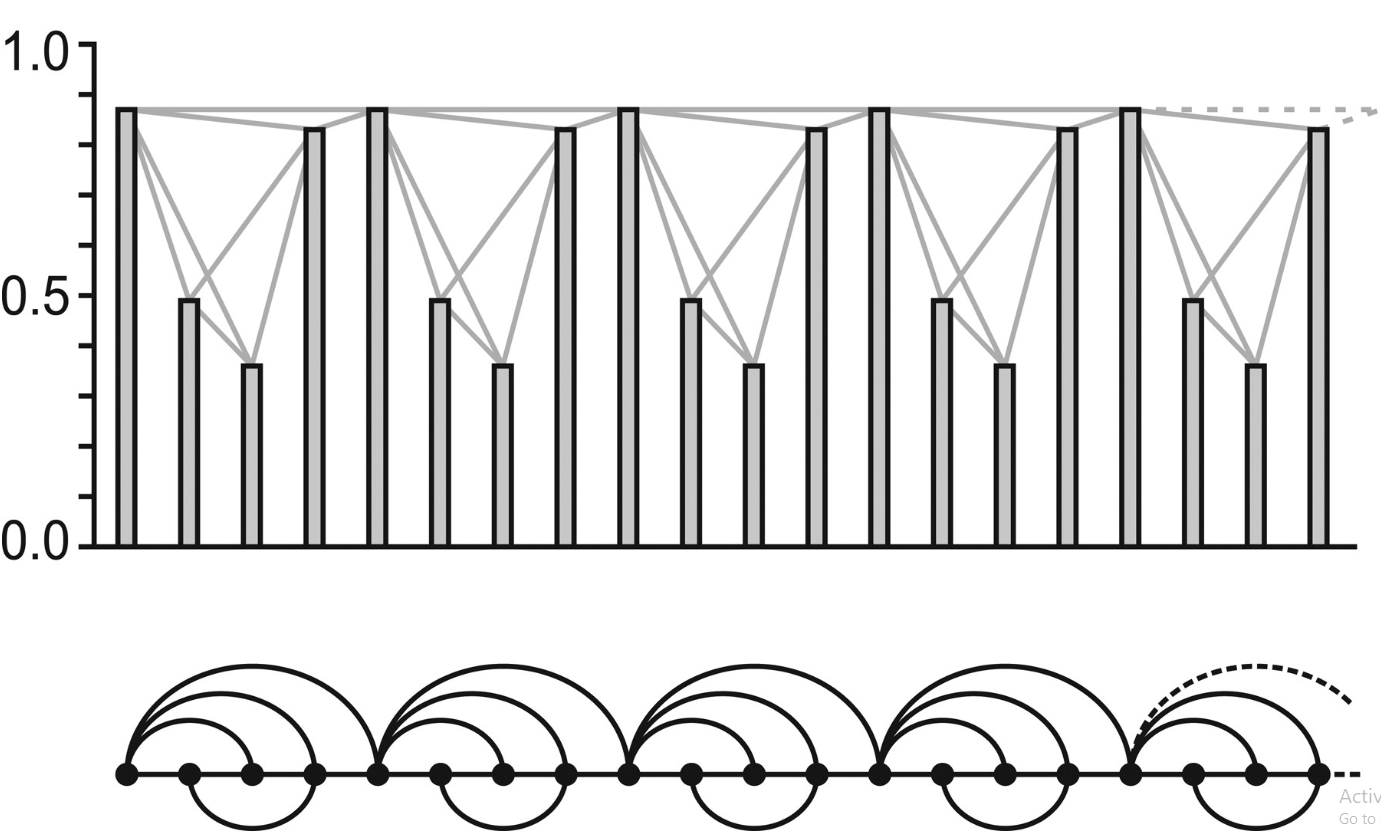

**Horizontal Visibility Graph (HVG)**


The horizontal visibility algorithm maps time series into graphs and it is defined as follows. Let $\left\{x_{i}\right\}_{i=1 . . N}$ be a time series of $N$ data. The algorithm assigns each datum of the series to a node in the horizontal visibility graph (graph from now on). Two nodes $i$ and $j$ in the graph are connected if one can draw a horizontal line in the time series joining $x_{i}$ and $x_{j}$ that does not intersect any intermediate data height (see figure 2 for a graphical illustration). Hence, $i$ and $j$ are two connected nodes if the following geometrical criterion is fulfilled within the time series:
$x_{i}, x_{j}>x_{n}$ for all $n$ such that $i<n<j$ 


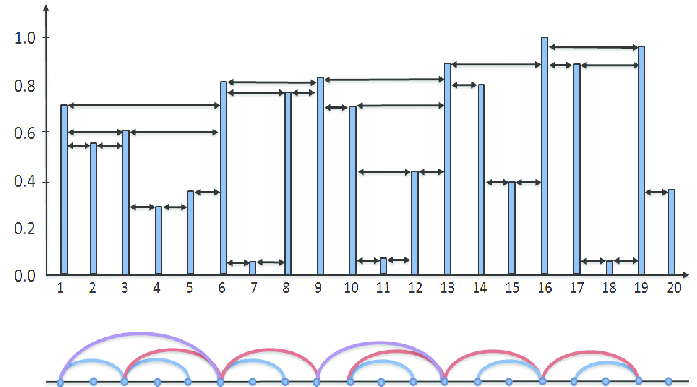

In [57]:
def task_1(subject: int, activity: str, graph: str, drawn: bool,axis: str, body_position: str):
    """
        This function computes the average degree, network diameter and average path length of 
        natural visibility graph (NVG) and horizontal visibility graph (HVG) of the time series.
        subject: each time series is the activity data for each subject ( there are 15 subjects in total)
        activitiy: represents for walking, running, climbing up and climbing down
        axis: represents for accelerometer signal of x,y or z
        body_position: represents for head or chest
    """
    print('Accelerometer axis:',axis)
    print(f'subject {subject}, {activity}, {body_position}, {graph} --------------------------- ')
    path = f"data_project_2/acc_{subject}_{activity}_csv/acc_{subject}_{activity}_{body_position}.csv"
    df = pd.read_csv(path)         # Acquire the dataset
    if not drawn: 
        print(df.head())
    sns.lineplot(x = range(1, len(df['attr_time'][1000:2024])+1), y = df['attr_' + axis][1000:2024])
    plt.show()          # Show the line graph of time series for each subject, each activity, each body position
                            # and each accelerometer signal
    
  
    if graph == "NVG":
        g = NaturalVG()
    else:
        g = HorizontalVG()
        
    g.build(df['attr_'+ axis][1000:2024])     # Each time series has 1024 data points (from 1000 to 2024)
    ig = g.as_igraph()
 
    number_node = ig.vcount()            # Total number of nodes in the graph
    link = ig.ecount()                   # Total number of links in the graph
    degree = np.mean(ig.degree())        # Compute the average degree
    diameter = ig.diameter()             # Compute the network diameter
    path_length = ig.average_path_length()      # Compute the average path length
    
    res_1 =  {'Method': graph,                # Res_1 is a dictionary with keys of (Method, Subject, Body Position,
            'Subject': subject,                # Accelerometer axis, Average degree, Network diameter,Average path length,   
            'Body Position': body_position,      # Acitivity)
            'Accelerometer axis': axis,
            'Average degree': degree,
            'Network diameter': diameter,
            'Average path length': path_length,
            'Activity': activity}
        
    return pd.DataFrame(res_1, index=[0])

In [1]:
res_list_1 = []
dataset_list = list(range(1,16))    # Subject runs from 1 to 15
activity_list = ['running', 'walking', 'climbingup','climbingdown']   
graph_type = ['NVG', 'HVG']      
axis_type = ['x','y','z']
body_position_list = ['head', 'chest']

# Used for loop to call the function to generate graphs for each subject, each activity, each type of graph, 
# each type of axis and each body position
for subject in dataset_list:    
    for activity in activity_list:
        drawn = False
        for graph in graph_type:
            for axis in axis_type:
                for body_position in body_position_list:
                    res_1 = task_1(subject, activity, graph, drawn, axis, body_position)
                    drawn = True
                    res_list_1.append(res_1)     


## Tabulate the results

In [59]:
tabulate_1 = pd.concat(res_list_1).reset_index()
tabulate_1.to_csv('tabulate_df_1.csv') # saving the df in csv file

In [60]:
tabulate_1

,index,Method,Subject,Body Position,Accelerometer axis,Average degree,Network diameter,Average path length,Activity
0,0,NVG,1,head,x,9.601562,9,4.617489,running
1,0,NVG,1,chest,x,8.414062,9,4.307645,running
2,0,NVG,1,head,y,9.013672,9,4.969256,running
3,0,NVG,1,chest,y,11.136719,82,28.651949,running
4,0,NVG,1,head,z,8.146484,10,4.960036,running
...,...,...,...,...,...,...,...,...,...
715,0,HVG,15,chest,x,3.951172,33,13.926625,climbingdown
716,0,HVG,15,head,y,3.939453,34,14.328954,climbingdown
717,0,HVG,15,chest,y,3.941406,31,13.582100,climbingdown
718,0,HVG,15,head,z,3.939453,39,16.957489,climbingdown


## Generate scatter plots: average degree and network diameter for walking and running

###  Natural Visibility Graph (NVG)

In [61]:
def plot_scatter_runwalk_NVG(data, body_position, axis):
    """
        This function is used to plot the scatter plots of average degree and network diameter of NVG graph for 15 subjets
        of walking and running activity.
        data: data will be used for plotting
        body_position: head or chest
        axis: x,y or z
    """
    plt.figure(figsize = (14,9))
    # Use seaborn to plot scatter plot, 'hue' is used for making different colors of walking and running, 
    #'style' is used for making different markers for 15 subjects.
    sns.scatterplot(data = data,                   
                    x = 'Average degree',
                    y = 'Network diameter',
                    hue = 'Activity',
                    style = 'Subject')
    
    # setting labels and title for plot
    plt.xlabel("Network Diameter", fontsize = 14)
    plt.ylabel("Average Degree", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Average Degree vs. Network Diameter of Walking and Running (NVG) for {body_position} postition at {axis} axis', 
              fontsize = 16)
    plt.show()

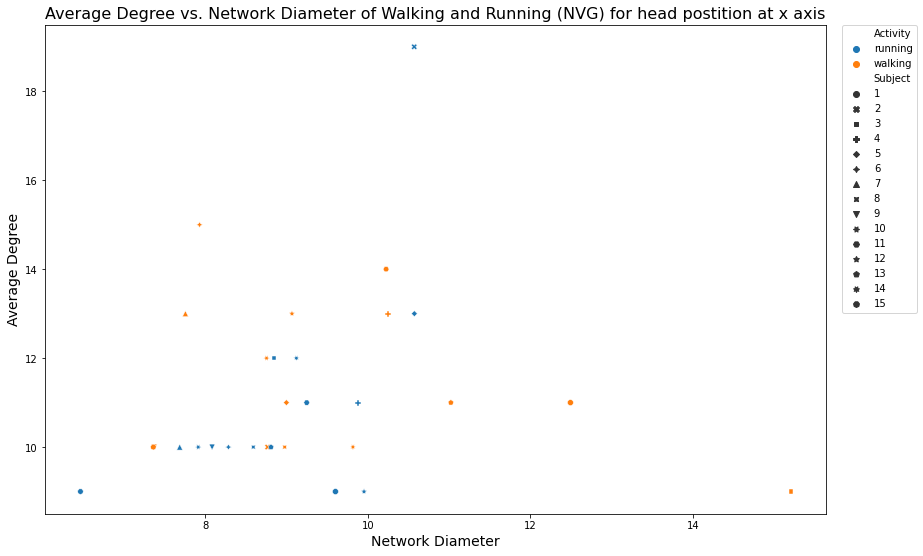

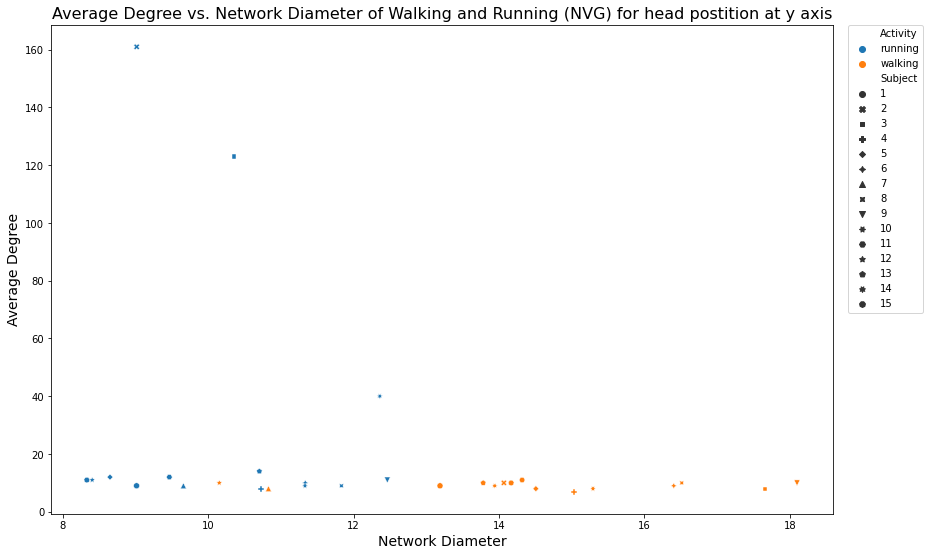

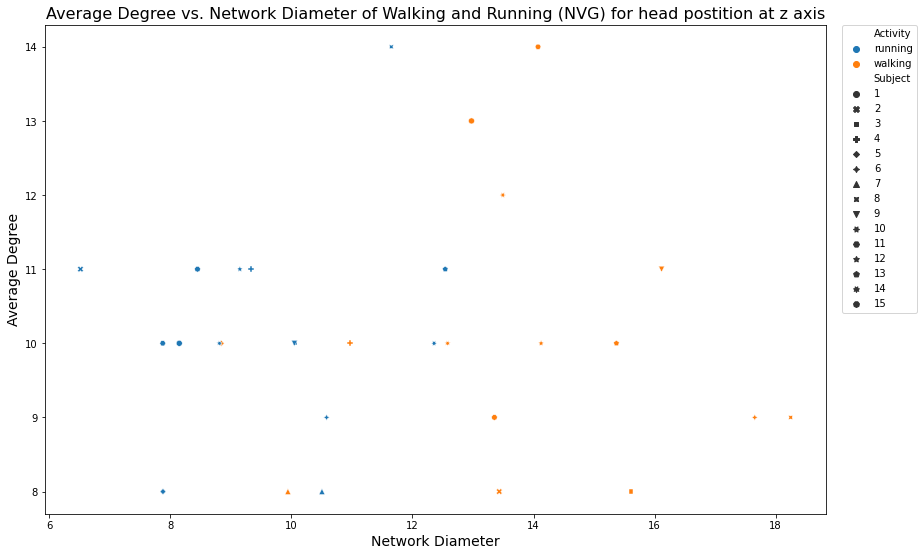

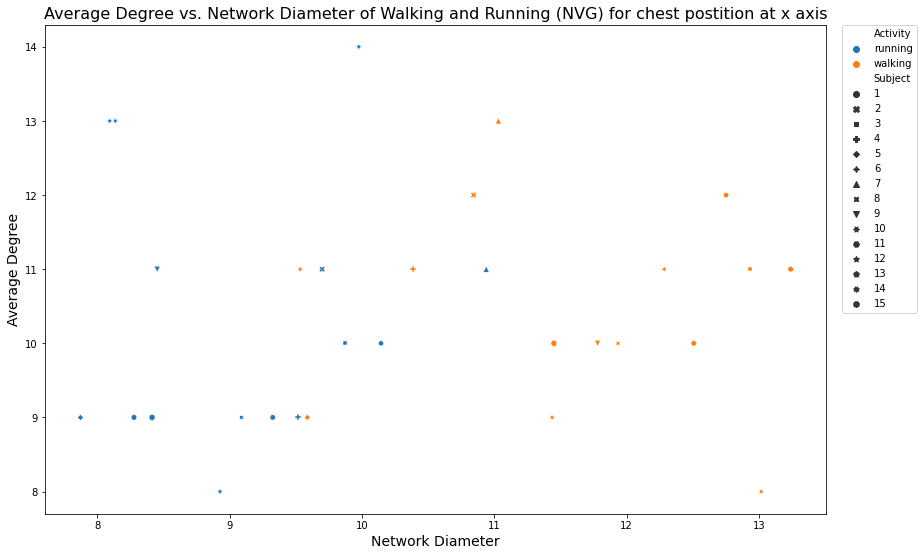

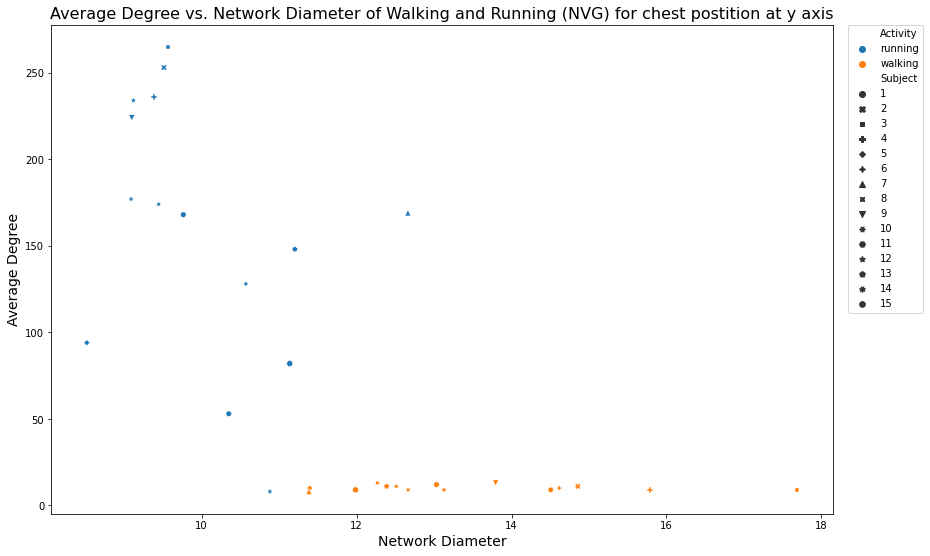

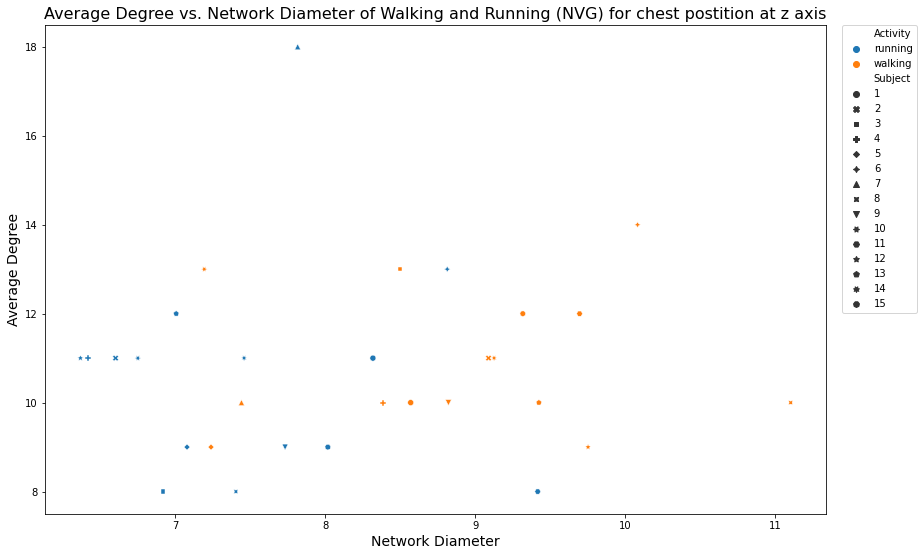

In [62]:
run_walk = tabulate_1[(tabulate_1['Activity'] == 'running') | (tabulate_1['Activity'] == 'walking')] # Get the dataset with activity of running or walking
run_walk_nvg = run_walk[run_walk['Method'] == 'NVG'] # Filter the dataset with method of Natural Visibility Graph (NVG)

body_position_list = ['head', 'chest']
axis_type = ['x','y','z']

# calling the function in for loop to generate all different kinds of graphs
for body_position in body_position_list: 
    for axis in axis_type:
        data = run_walk_nvg[(run_walk_nvg['Body Position'] == body_position) & (run_walk_nvg['Accelerometer axis'] == axis)] # getting the data according to position and axis in a loop
        plot_scatter_runwalk_NVG(data, body_position, axis)

### Horizontal Visibility Graph (HVG)

In [63]:
def plot_scatter_runwalk_HVG(data, body_position, axis):
    """
        This function is used to plot the scatter plots of average degree and network diameter of HVG graph for 15 subjets
        of walking and running activity.
        data: data will be used for plotting
        bosy_position: head or chest
        axis: x,y or z
    """
    plt.figure(figsize = (14,9))
    
    # Use seaborn to plot scatter plot, 'hue' is used for making different colors of walking and running, 
    #'style' is used for making different markers for 15 subjects.
    sns.scatterplot(data = data,
                    x = 'Average degree',
                    y = 'Network diameter',
                    hue = 'Activity',
                    style = 'Subject')

    # setting labels, legend and title for plot
    plt.xlabel("Network Diameter", fontsize = 14)
    plt.ylabel("Average Degree", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Average Degree vs. Network Diameter of Walking and Running (HVG) for {body_position} postition at {axis} axis', 
              fontsize = 16)
    plt.show()

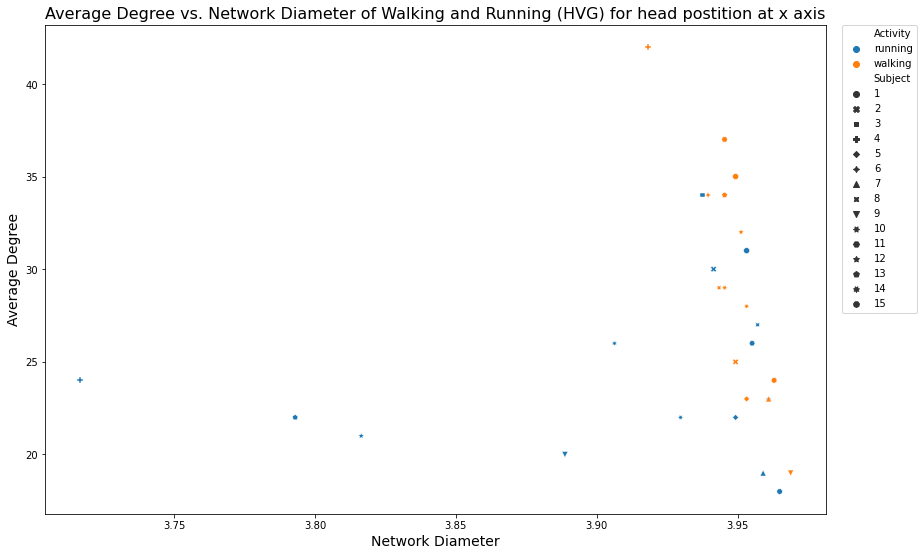

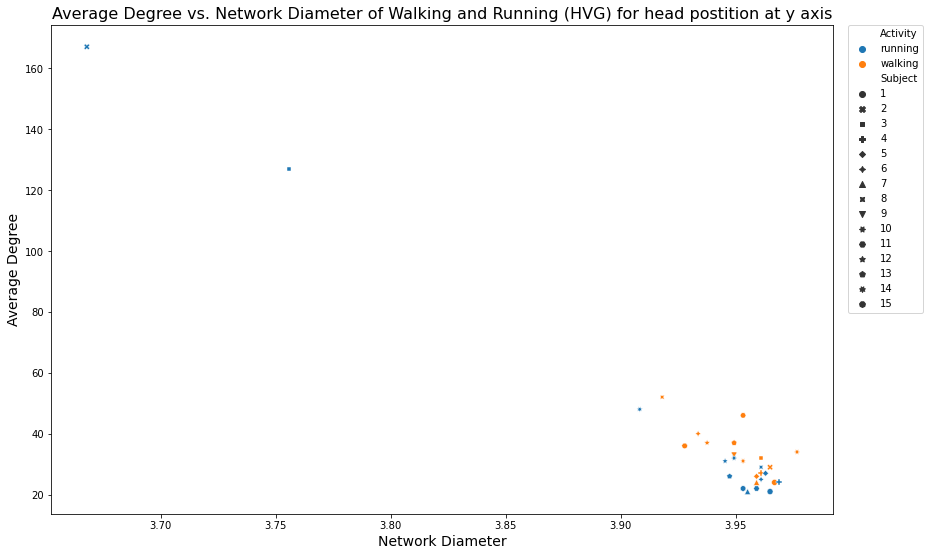

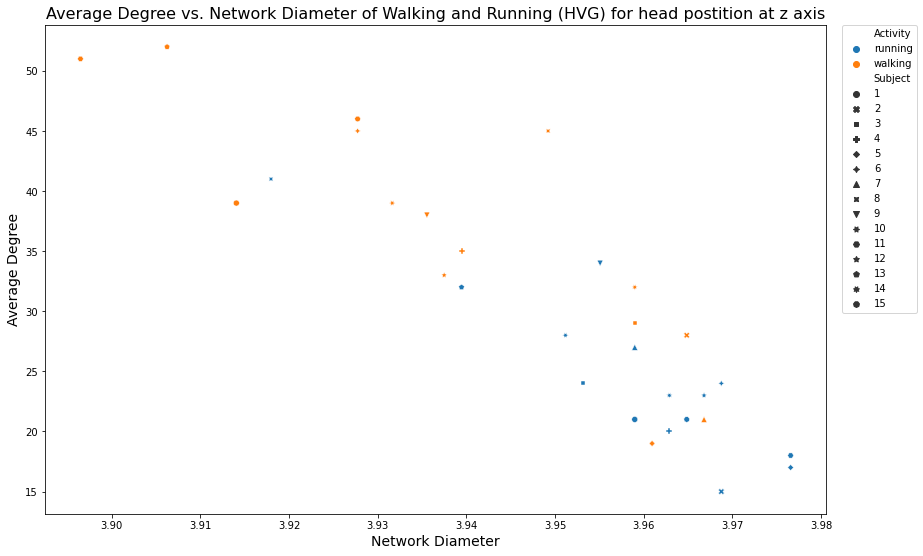

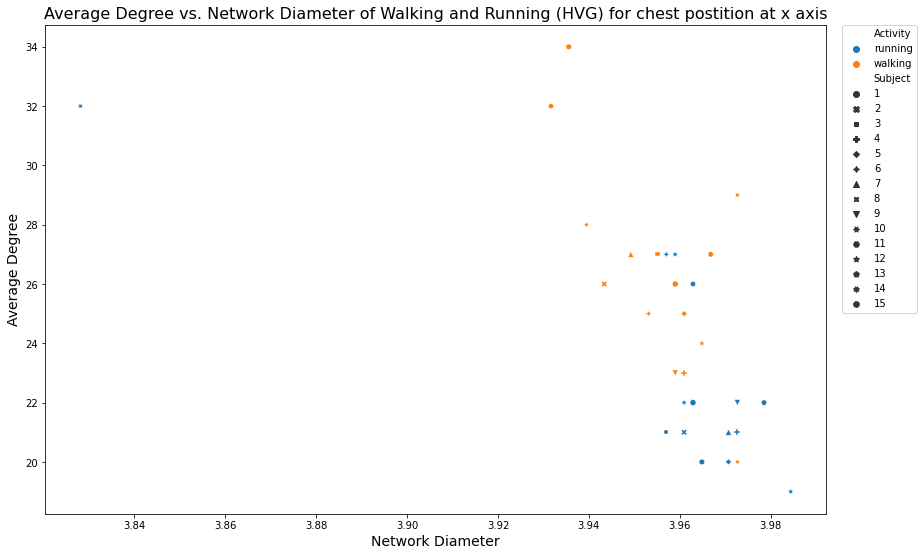

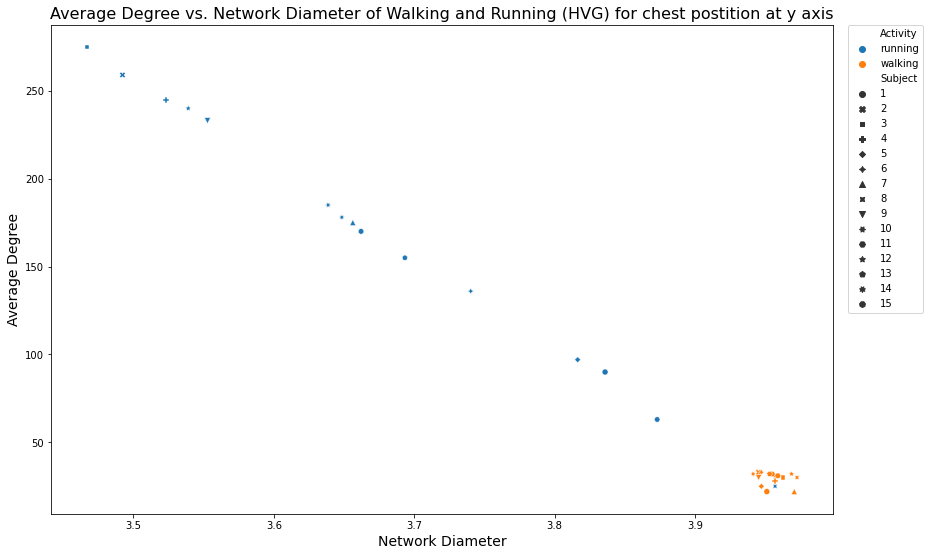

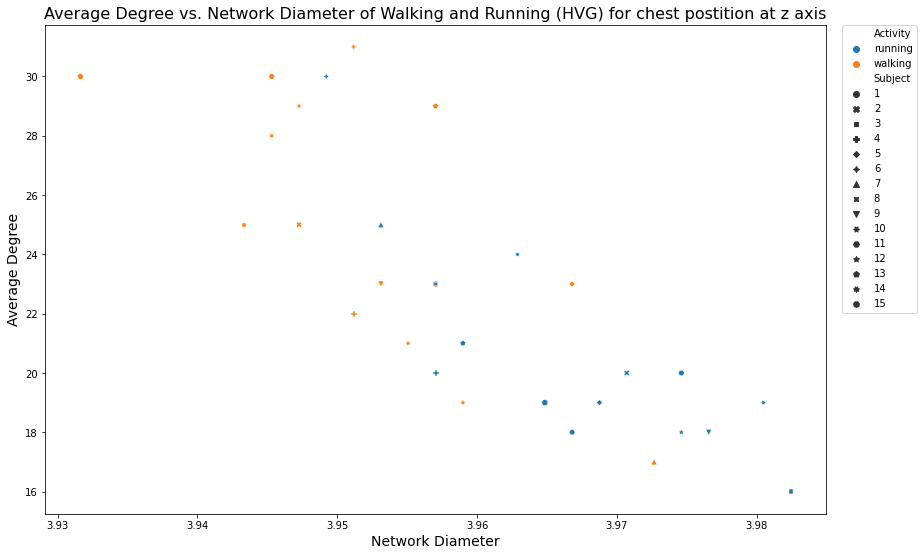

In [64]:
run_walk = tabulate_1[(tabulate_1['Activity'] == 'running') | (tabulate_1['Activity'] == 'walking')]  # Get the dataset with activity of running or walking
run_walk_hvg = run_walk[run_walk['Method'] == 'HVG']  # Filter the dataset with method of Horizontal Visibility Graph (HVG)

body_position_list = ['head', 'chest']
axis_type = ['x','y','z']

# calling the function in for loop to generate all different kinds of graphs
for body_position in body_position_list: 
    for axis in axis_type:
        data = run_walk_hvg[(run_walk_hvg['Body Position'] == body_position) & (run_walk_hvg['Accelerometer axis'] == axis)]  # getting the data according to position and axis in a loop
        plot_scatter_runwalk_HVG(data, body_position, axis)


## Generate scatter plots: average degree and network diameter for climbing up and climbing down

###  Natural Visibility Graph (NVG)

In [65]:
def plot_scatter_climbing_NVG(data, body_position, axis):
    """
        This function is used to plot the scatter plots of average degree and network diameter of NVG graph for 15 subjets
        of climbing up and climbing down activity.
        data: data will be used for plotting
        bosy_position: head or chest
        axis: x,y or z
    """
    plt.figure(figsize = (14,9))
    # Use seaborn to plot scatter plot, 'hue' is used for making different colors of climbing up and climbing down, 
    #'style' is used for making different markers for 15 subjects.
    sns.scatterplot(data = data,
                    x = 'Average degree',
                    y = 'Network diameter',
                    hue = 'Activity',
                    style = 'Subject')
    
    # setting labels, legend and title for plot
    plt.xlabel("Network Diameter", fontsize = 14)
    plt.ylabel("Average Degree", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Average Degree vs. Network Diameter of Climbing up and Climbing down (NVG) for {body_position} postition at {axis} axis', 
              fontsize = 16)
    plt.show()

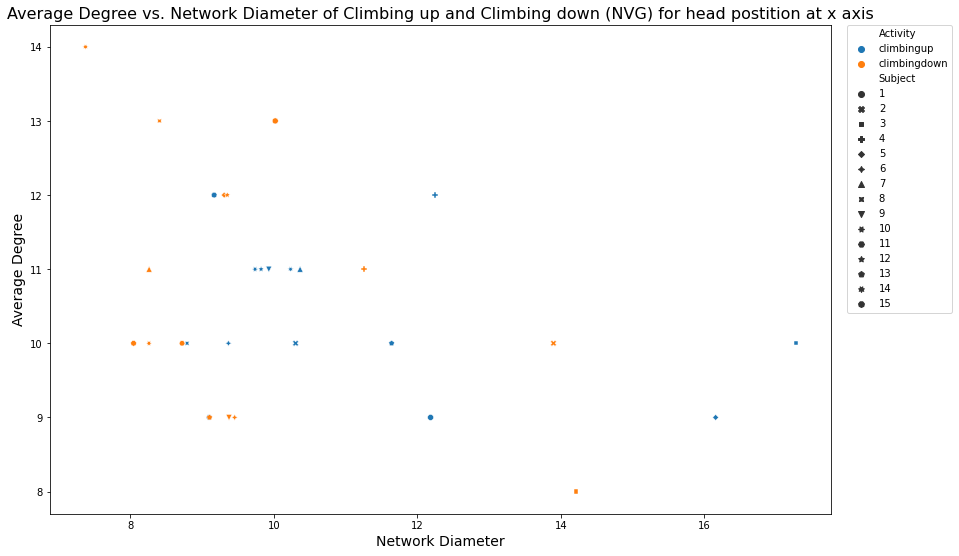

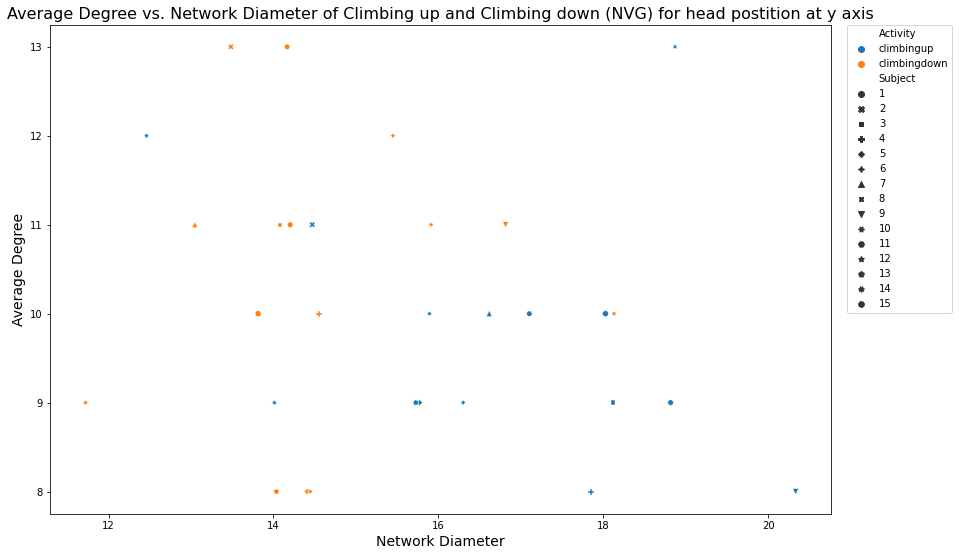

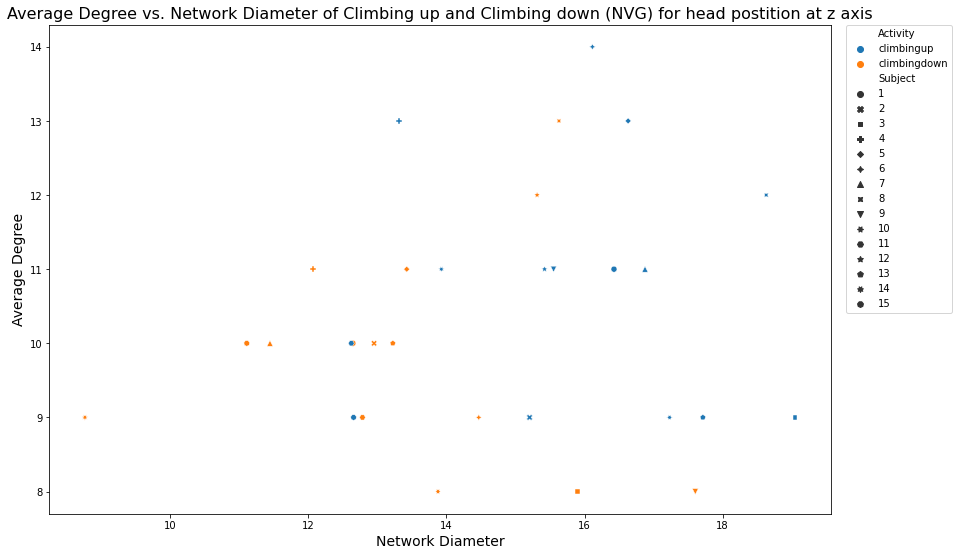

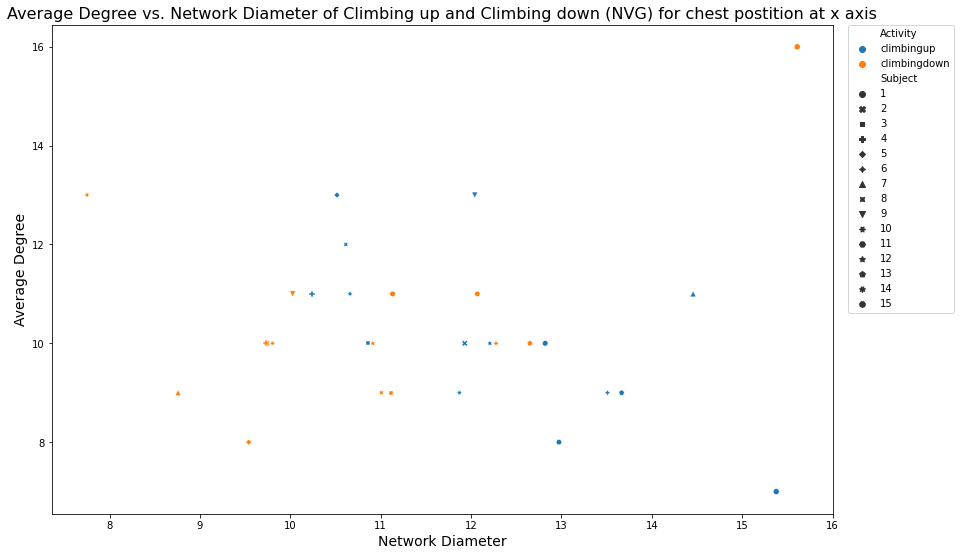

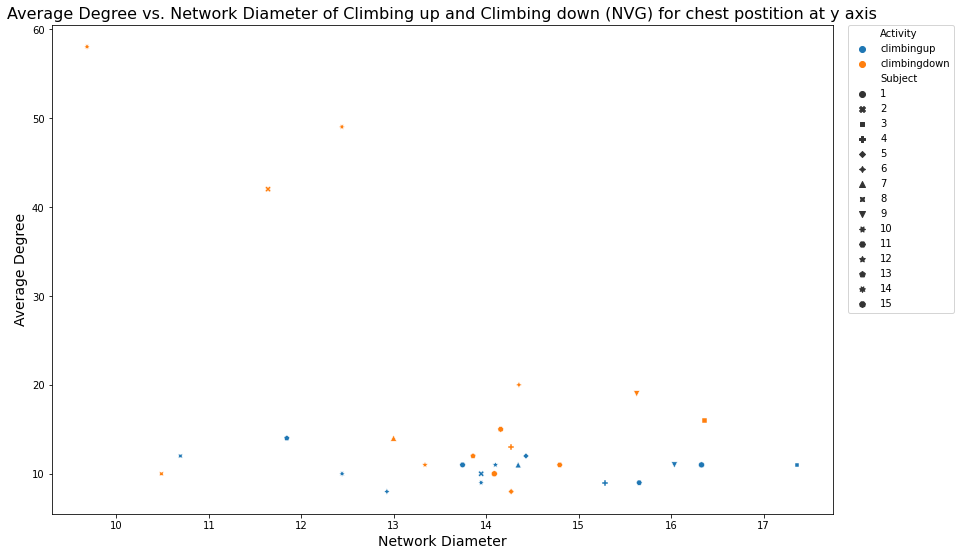

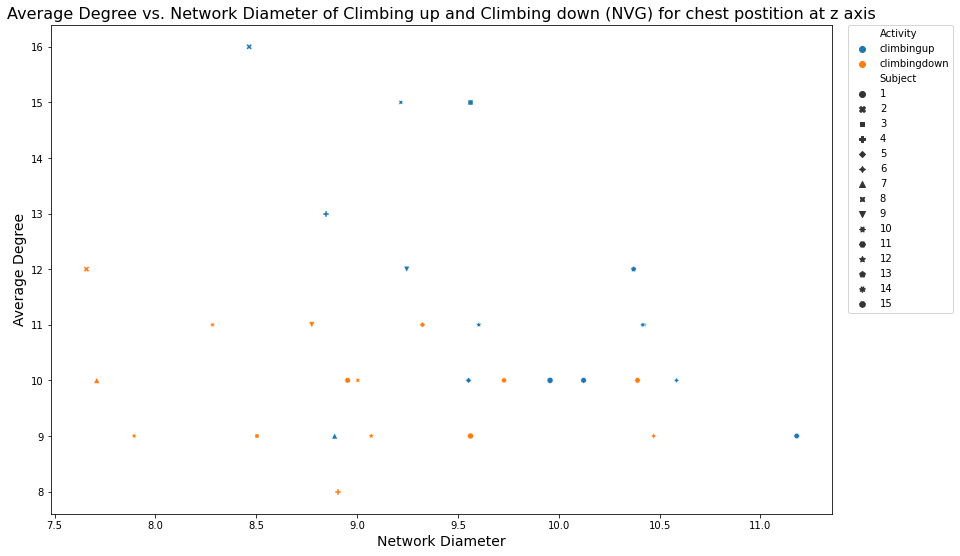

In [66]:
# Get the dataset with activity of climbing up or climbing down
climbing= tabulate_1[(tabulate_1['Activity'] == 'climbingup') | (tabulate_1['Activity'] == 'climbingdown')]
# Filter the dataset with method of Natural Visibility Graph (NVG)
climbing_nvg = climbing[climbing['Method'] == 'NVG']

body_position_list = ['head', 'chest']
axis_type = ['x','y','z']

# calling the function in for loop to generate all different kinds of graphs
for body_position in body_position_list: 
    for axis in axis_type:
        data = climbing_nvg[(climbing_nvg['Body Position'] == body_position) & (climbing_nvg['Accelerometer axis'] == axis)]
        plot_scatter_climbing_NVG(data, body_position, axis)

### Horizontal Visibility Graph (HVG)

In [67]:
def plot_scatter_climbing_HVG(data, body_position, axis):
    """
        This function is used to plot the scatter plots of average degree and network diameter of HVG graph for 15 subjets
        of climbing up and climbing down activity.
        data: data will be used for plotting
        bosy_position: head or chest
        axis: x,y or z
    """
    plt.figure(figsize = (14,9))
    # Use seaborn to plot scatter plot, 'hue' is used for making different colors of climbing up and climbing down, 
    #'style' is used for making different markers for 15 subjects.
    sns.scatterplot(data = data,
                    x = 'Average degree',
                    y = 'Network diameter',
                    hue = 'Activity',
                    style = 'Subject')
    
    plt.xlabel("Network Diameter", fontsize = 14)
    plt.ylabel("Average Degree", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Average Degree vs. Network Diameter of Climbing up and Climbing down (HVG) for {body_position} postition at {axis} axis', 
              fontsize = 16)
    plt.show()

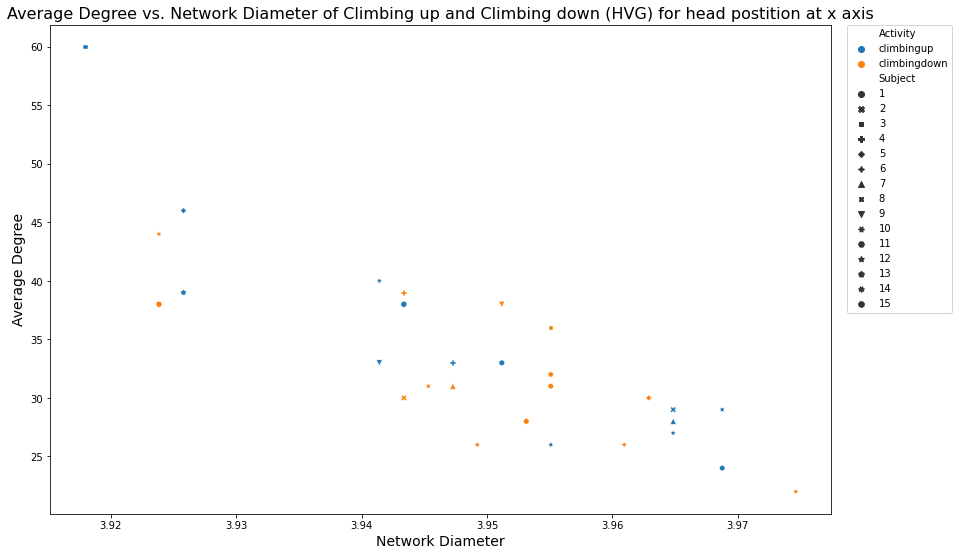

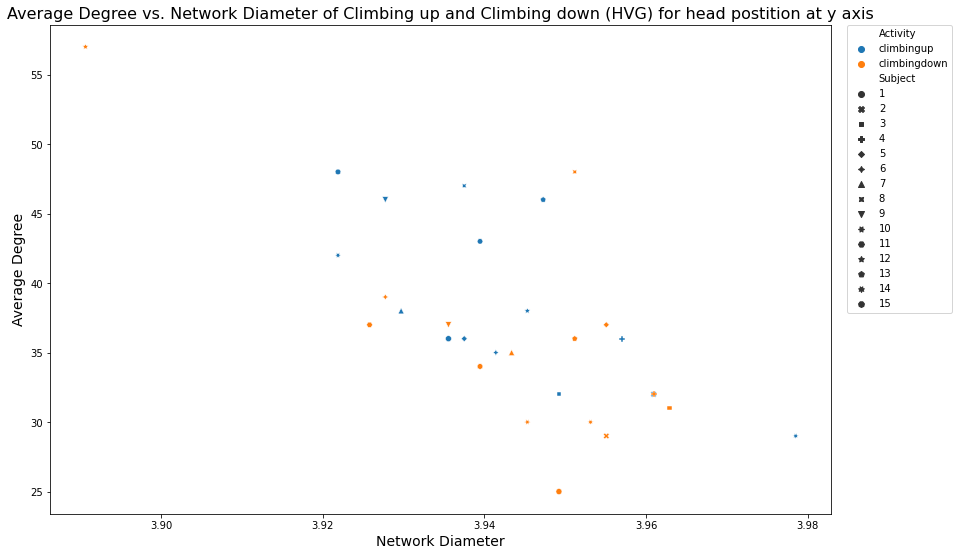

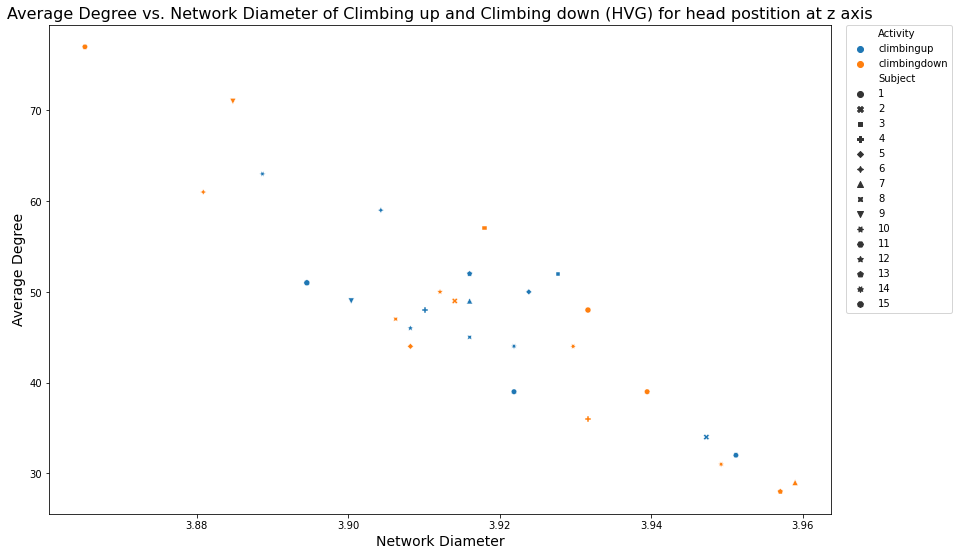

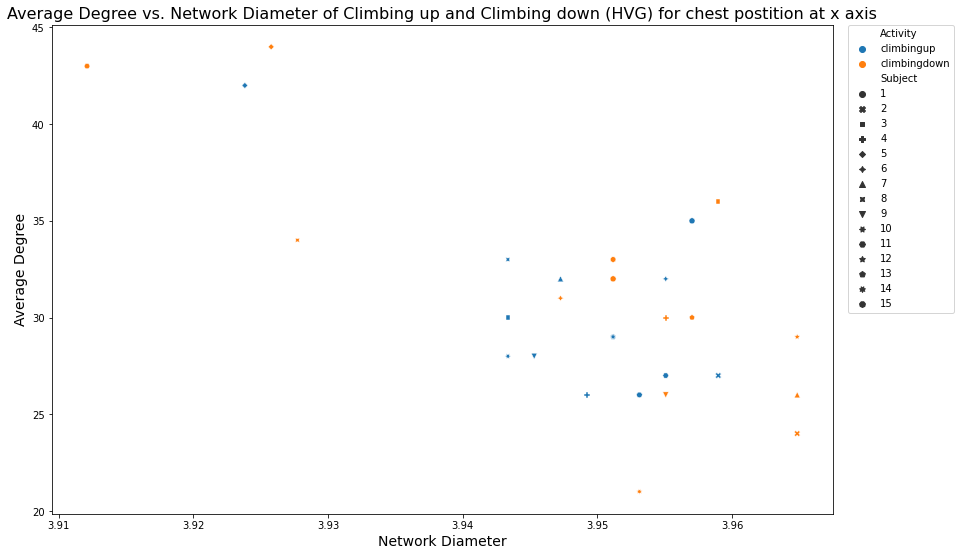

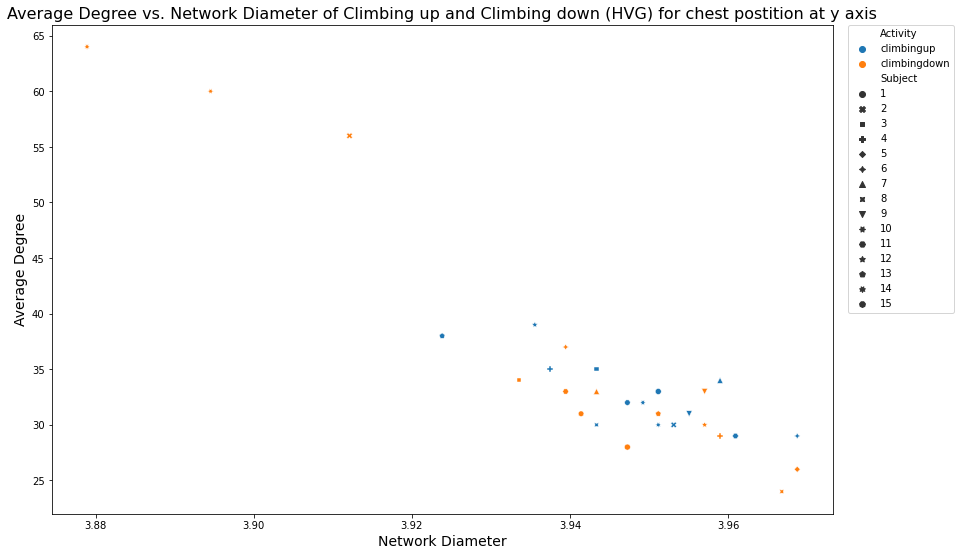

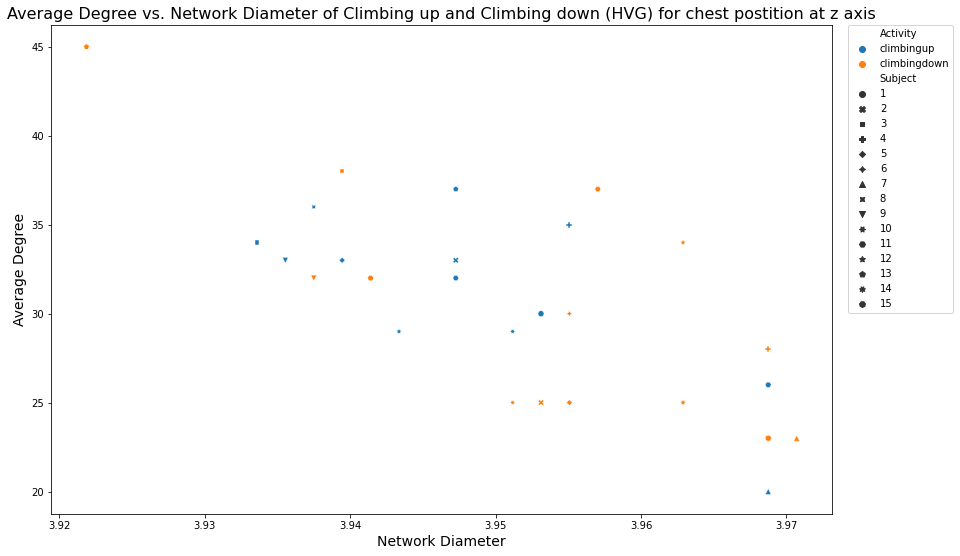

In [68]:
# Get the dataset with activity of climbing up or climbing down
climbing= tabulate_1[(tabulate_1['Activity'] == 'climbingup') | (tabulate_1['Activity'] == 'climbingdown')]
# Filter the dataset with method of Horizontal Visibility Graph (HVG)
climbing_nvg = climbing[climbing['Method'] == 'HVG']

body_position_list = ['head', 'chest']
axis_type = ['x','y','z']

# calling the function in for loop to generate all different kinds of graphs
for body_position in body_position_list: 
    for axis in axis_type:
        data = climbing_nvg[(climbing_nvg['Body Position'] == body_position) & (climbing_nvg['Accelerometer axis'] == axis)]
        plot_scatter_climbing_HVG(data, body_position, axis)

# Task 2

## Compute permutation entropy and complexity

In [69]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

# Function to calculate the entropy
def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [70]:
def task_2(subject: str, activity: str, axis: str, dimension: int, delay: int, length: int, body_position: str):
    """
        This function computes permutaion entropy and complexity for the time series of activity data for 15 subjects.
        subject: each time series is the activity data for each subject ( there are 15 subjects in total)
        activitiy: represents for walking, running, climbing up and climbing down
        axis: represents for accelerometer signal x,y or z
        dimension (or embedded dimension): 3,4,5,6
        delay (or embedded delay): 1,2,3
        length: the number of data points (1024, 2048, 4096)
        body_position: represents for head or chest
    """

    path = f'data_project_2/acc_{subject}_{activity}_csv/acc_{subject}_{activity}_{body_position}.csv'
    df = pd.read_csv(path)
    
    j = 1000 # the first point of time series is at index 1000
    op_activity = ordinal_patterns((df['attr_'+ axis][j:(length+j)]), dimension, delay)   
    pe = p_entropy(op_activity)           # Compute permutation entropy
    comp = complexity(op_activity)        # Compute complexity
 
    res_2 =  {'Subject': subject,                
            'Body Position': body_position,    
            'Accelerometer axis': axis,
            'Signal Length': length,
            'Dimension': dimension,
            'Delay': delay,
            'Permutation entropy': pe,
            'Complexity': comp,
            'Activity': activity}
        
    return pd.DataFrame(res_2, index=[0])

In [71]:
res_list_2 = []
subject_list = list(range(1,16))       # Subjects run from 1 to 15
body_position_list = ['head', 'chest']
activity_list = ['walking', 'running', 'climbingup', 'climbingdown']
accelerometer_axis = ['x', 'y', 'z']
embedded_dimension =[3,4,5,6]
embedded_delay = [1,2,3]
signal_length = [1024,2048,4096]


# Use for loop to generate graphs by calling the function for each subject, each activity, each type of axis, 
#each body position, each embedded dimension, each embedded delay and each signal length.
for subject in tqdm(subject_list): 
    for body_position in body_position_list:
        for activity in activity_list:
            for axis in accelerometer_axis:
                for dimension in embedded_dimension:
                    for delay in embedded_delay:
                        for length in signal_length:
                            res_2 = task_2(subject, activity, axis, dimension, delay, length, body_position)
                            res_list_2.append(res_2)
#                             display(res_2)


100%|██████████| 15/15 [02:56<00:00, 11.75s/it]


## Tabulate all the results

In [72]:
tabulate_2 = pd.concat(res_list_2).reset_index()
tabulate_2.to_csv('tabulate_df_2.csv') # saving the dataframe into csv file
tabulate_2

,index,Subject,Body Position,Accelerometer axis,Signal Length,Dimension,Delay,Permutation entropy,Complexity,Activity
0,0,1,head,x,1024,3,1,0.848094,0.124252,walking
1,0,1,head,x,2048,3,1,0.826066,0.139128,walking
2,0,1,head,x,4096,3,1,0.810322,0.147205,walking
3,0,1,head,x,1024,3,2,0.905920,0.081334,walking
4,0,1,head,x,2048,3,2,0.907332,0.079148,walking
...,...,...,...,...,...,...,...,...,...,...
12955,0,15,chest,z,2048,6,2,0.939813,0.122861,climbingdown
12956,0,15,chest,z,4096,6,2,0.930259,0.145734,climbingdown
12957,0,15,chest,z,1024,6,3,0.970422,0.061774,climbingdown
12958,0,15,chest,z,2048,6,3,0.962565,0.082738,climbingdown


## Generate scatter plots

In [73]:
df_result = tabulate_2
# Filter the dataset with signal length of 4096, embedded delay of 1 and embedded dimension of 3 or 4 or 5 or 6,
# in order to generate scatter plots
df_result = df_result[(df_result['Signal Length']==4096) & (df_result['Delay']==1) 
    & ((df_result['Dimension']==3) | (df_result['Dimension']==4) 
       | (df_result['Dimension']==5) | (df_result['Dimension']==6))]

df_result    

,index,Subject,Body Position,Accelerometer axis,Signal Length,Dimension,Delay,Permutation entropy,Complexity,Activity
2,0,1,head,x,4096,3,1,0.810322,0.147205,walking
11,0,1,head,x,4096,4,1,0.739724,0.221061,walking
20,0,1,head,x,4096,5,1,0.714683,0.272088,walking
29,0,1,head,x,4096,6,1,0.740662,0.275030,walking
38,0,1,head,y,4096,3,1,0.874437,0.105012,walking
...,...,...,...,...,...,...,...,...,...,...
12917,0,15,chest,y,4096,6,1,0.762124,0.290256,climbingdown
12926,0,15,chest,z,4096,3,1,0.876861,0.104334,climbingdown
12935,0,15,chest,z,4096,4,1,0.820052,0.187683,climbingdown
12944,0,15,chest,z,4096,5,1,0.804797,0.247598,climbingdown


### Generate scatter plots: permutation entropy and complexity for walking and running

In [74]:
def scatter_plot_runwalk(data, body_position, axis, dimension):
    """
        This function is used to plot the scatter plots of permutation entropy and complexity 
        for walking and running activity of 15 subjects.
        data: data will be used for plotting
        bosy_position: head or chest
        axis: x,y or z
        subject: from 1 to 15
    """
    plt.figure(figsize = (14,9))
     # Use seaborn to plot scatter plot, 'hue' is used for making different colors of walking and running, 
    #'style' is used for making different markers for 15 subjects.
    sns.scatterplot(data = data, 
                    x = 'Permutation entropy',
                    y = 'Complexity',
                    hue = 'Activity',
                    style = 'Subject')

    # setting labels, legend and title for the plot
    plt.xlabel("Permutation entropy", fontsize = 14)
    plt.ylabel("Complexity", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Permutation Entropy vs. Complexity for walking and running activity for {body_position} body postition at {axis} axis for dimension of {dimension}', 
              fontsize = 16)
    
    plt.show()

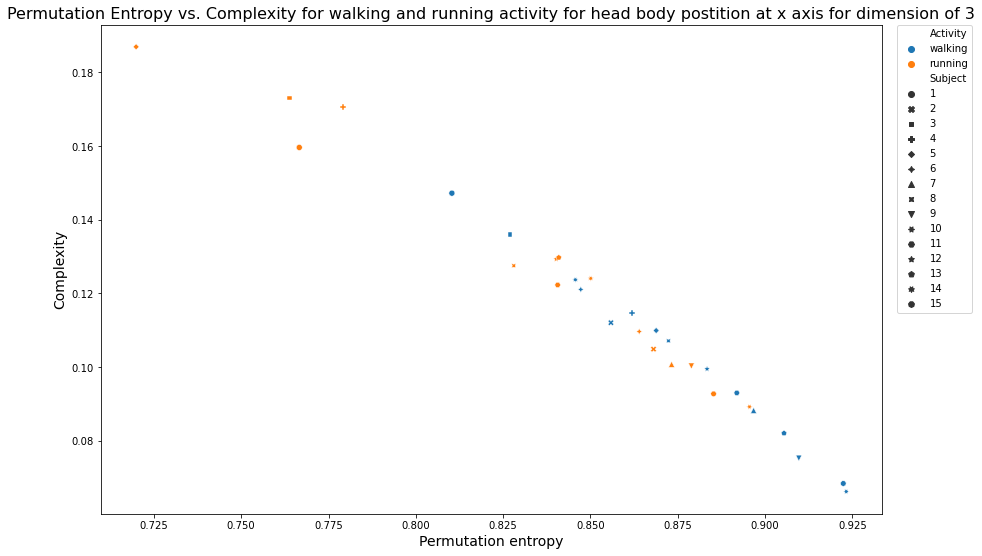

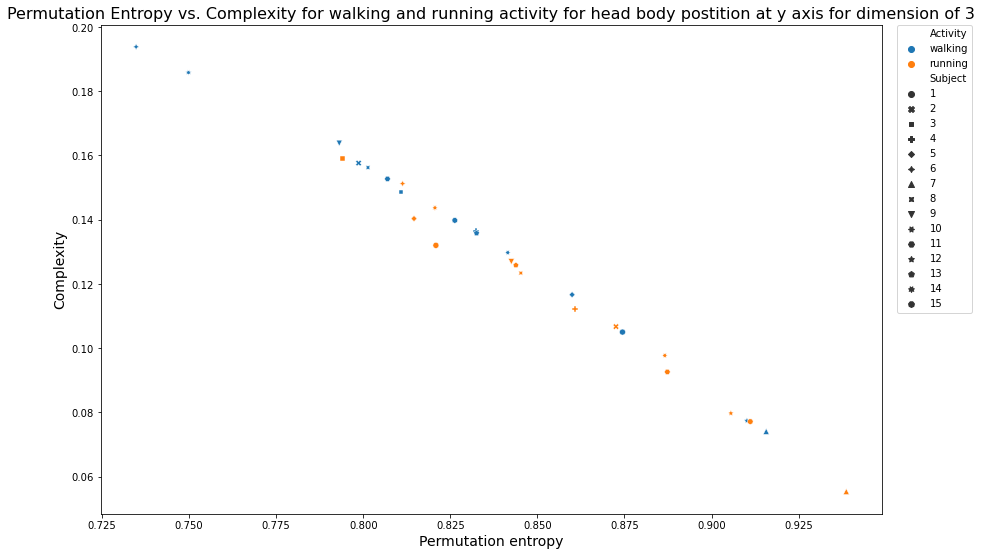

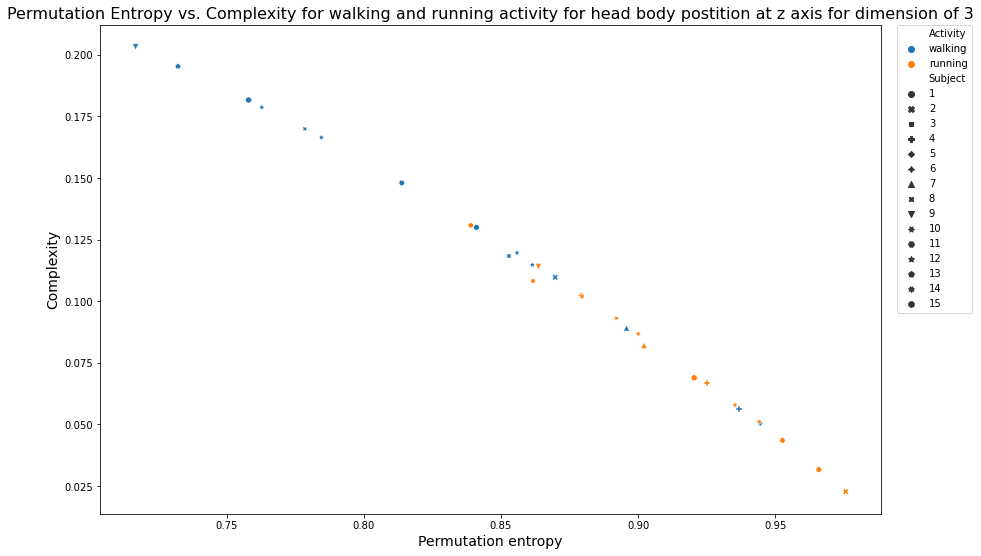

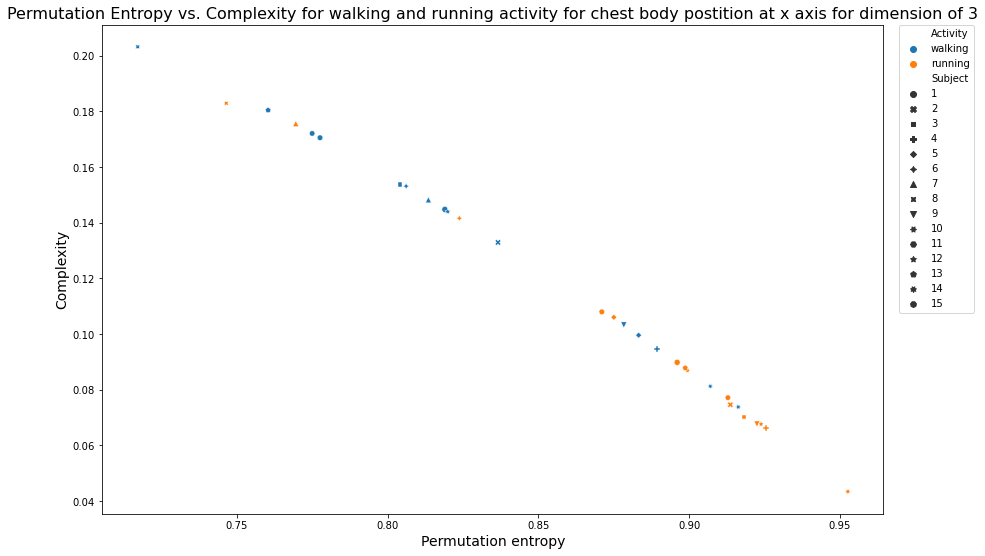

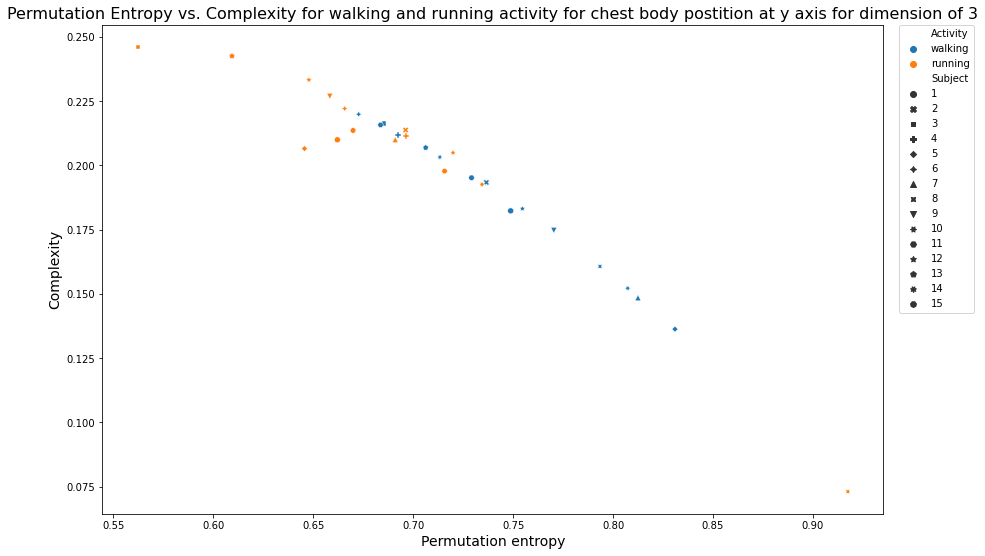

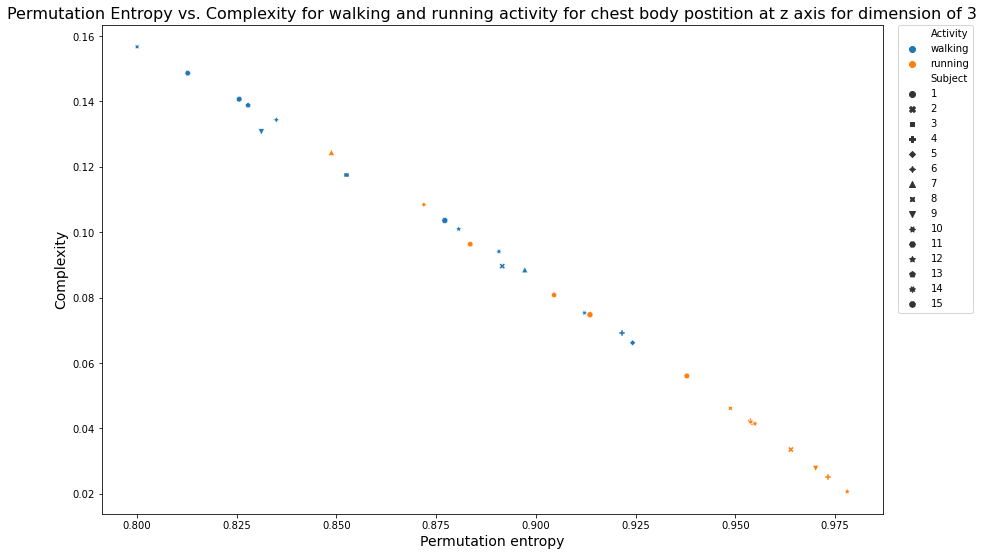

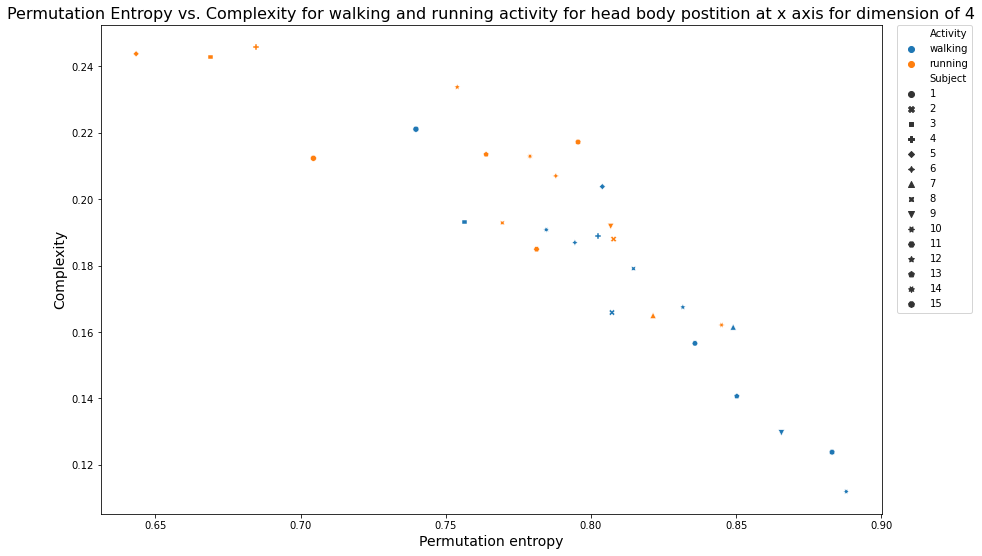

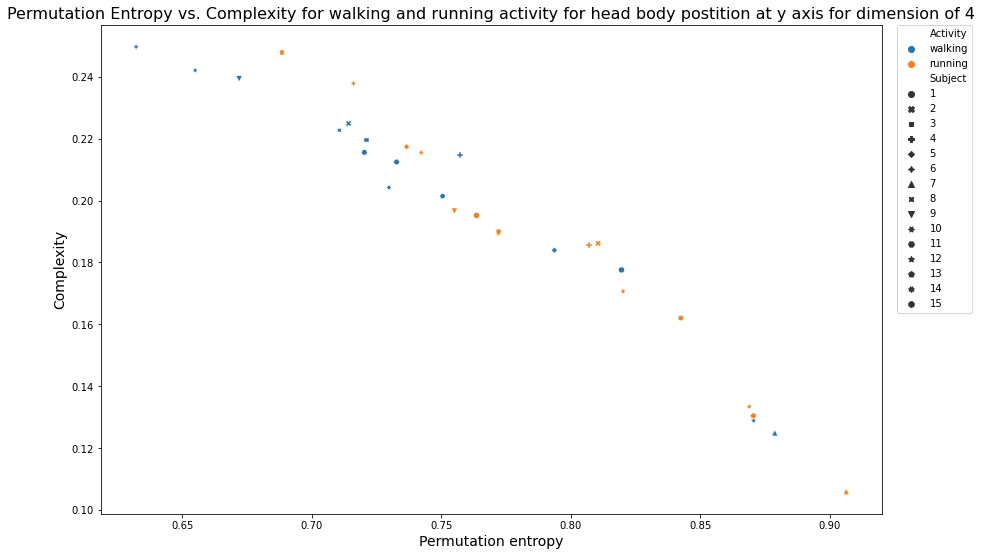

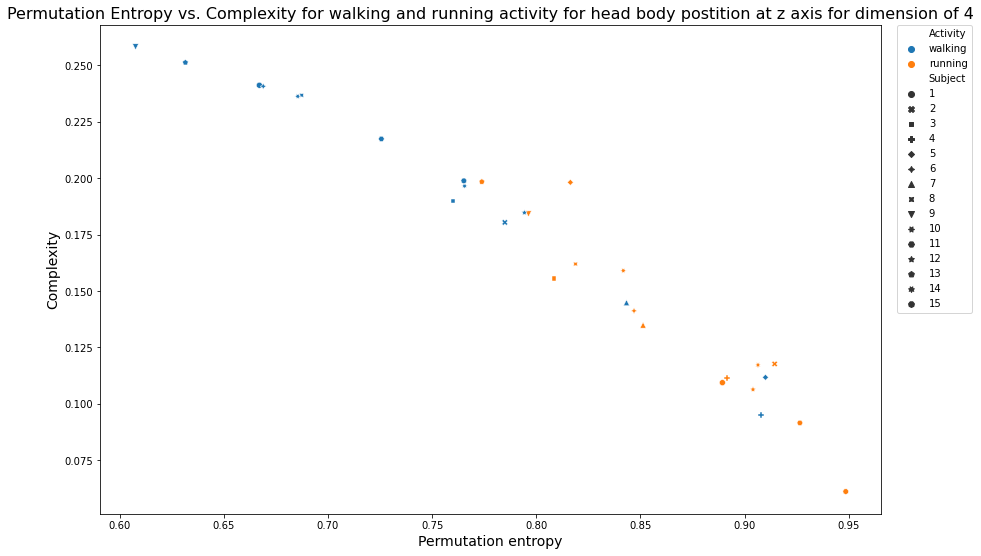

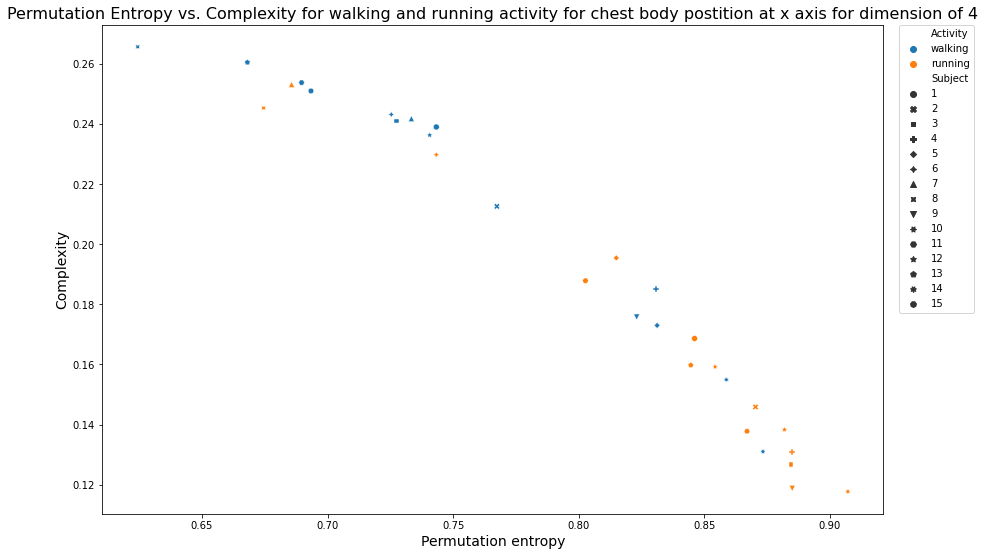

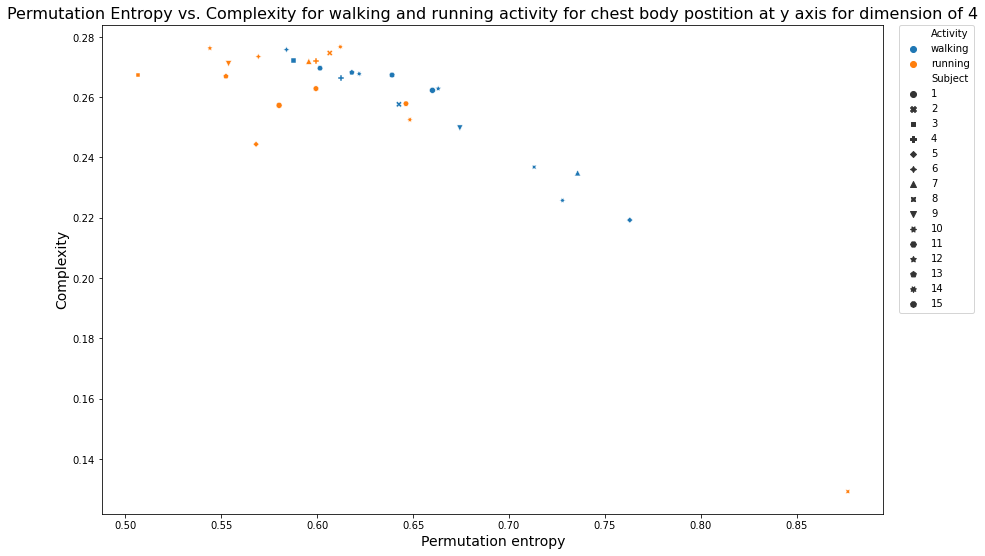

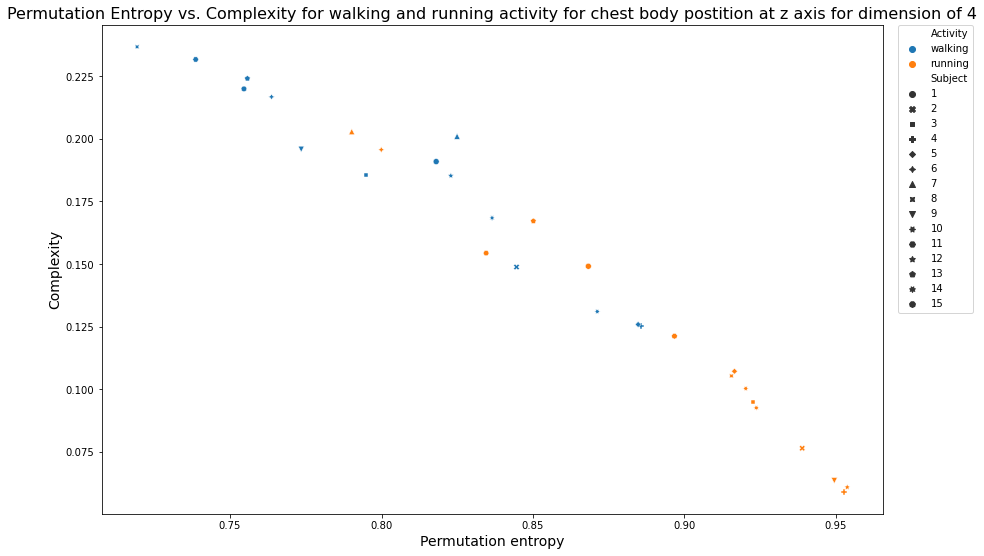

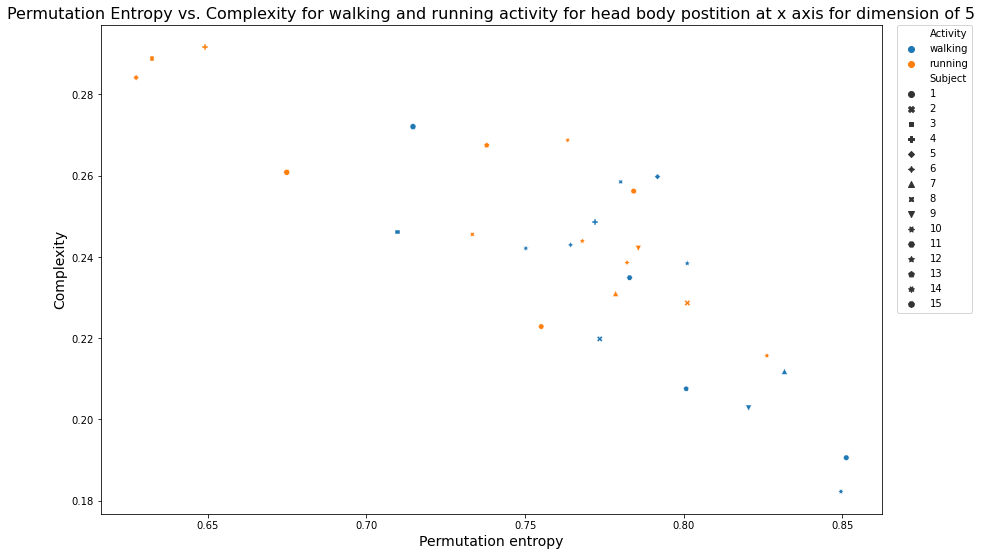

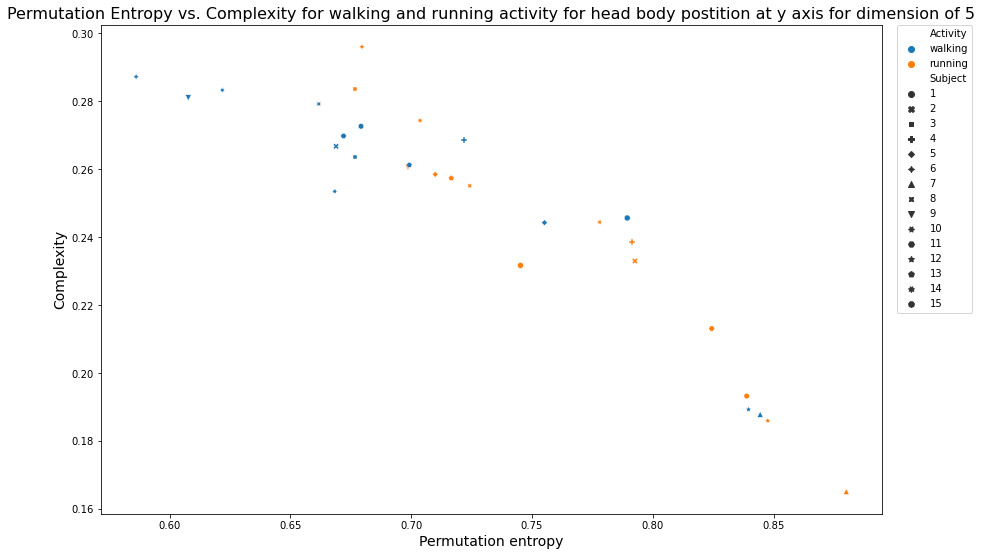

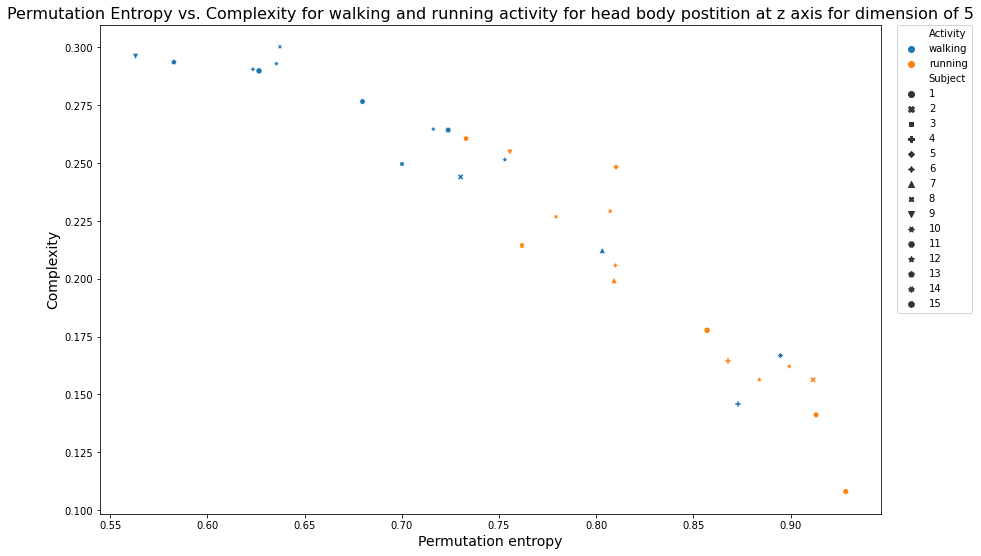

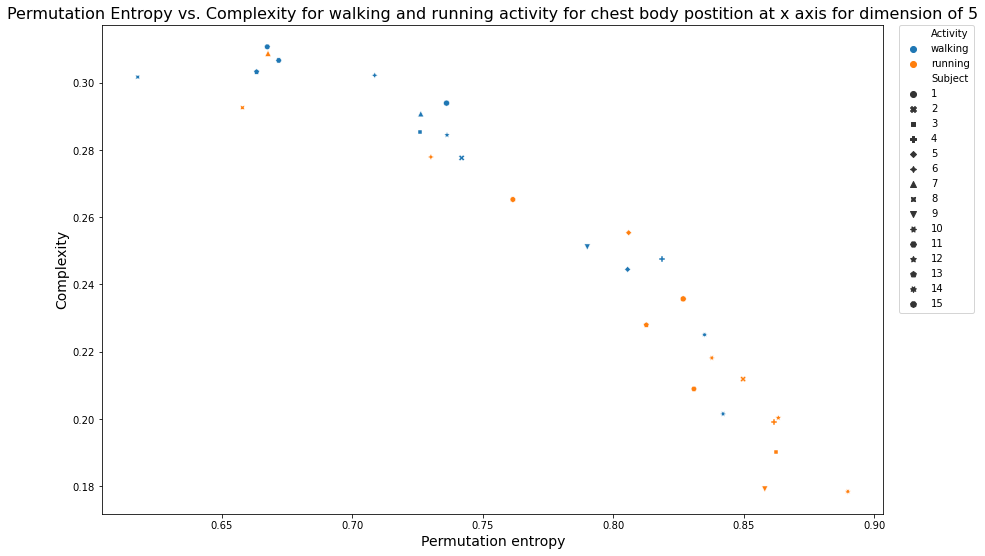

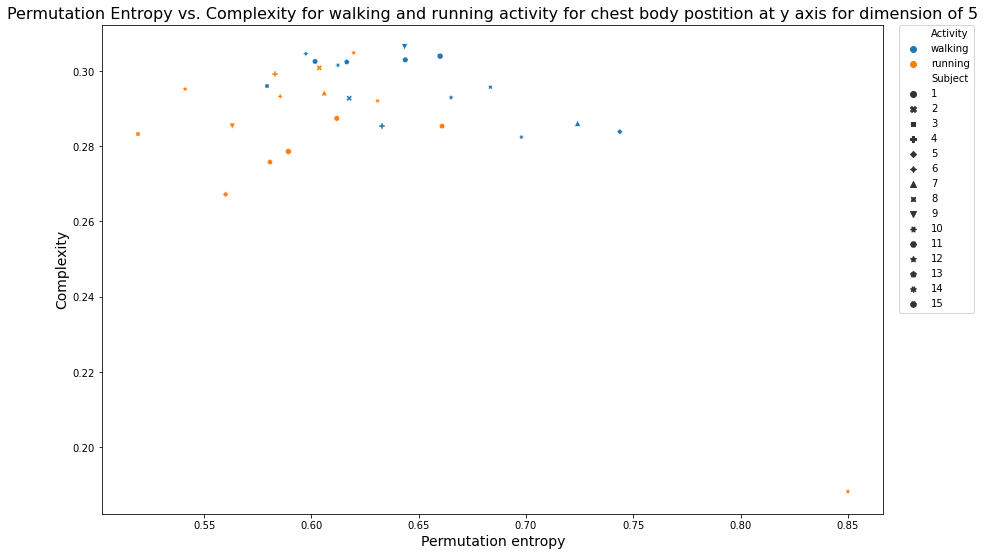

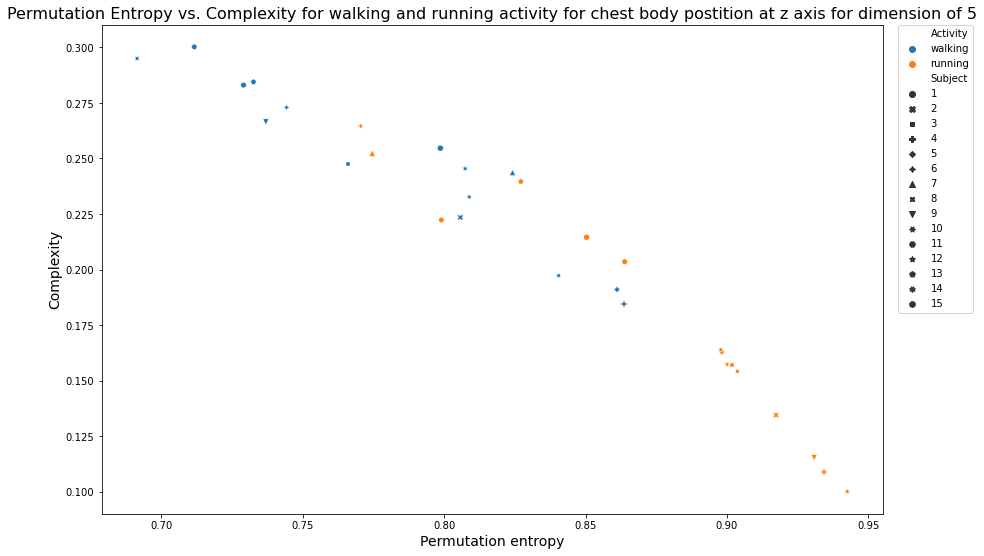

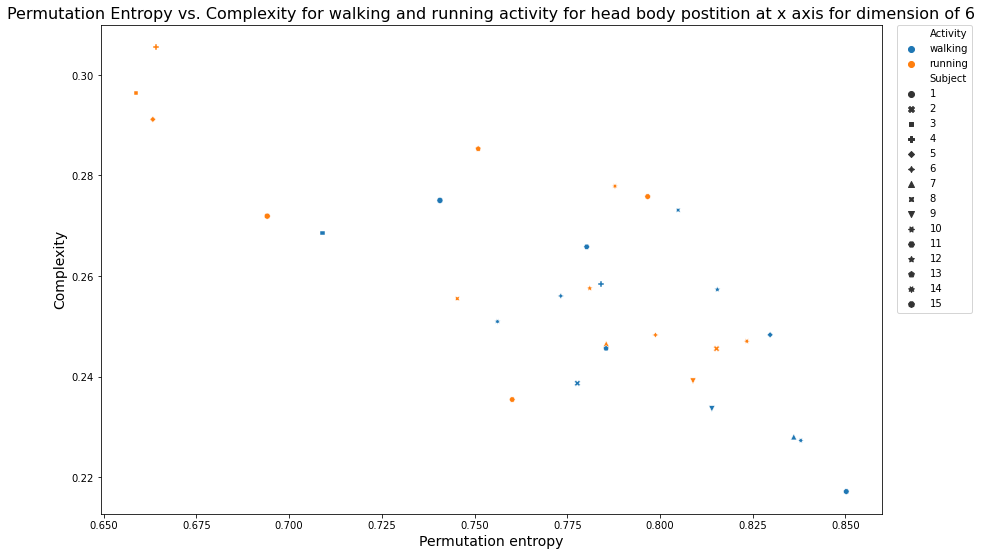

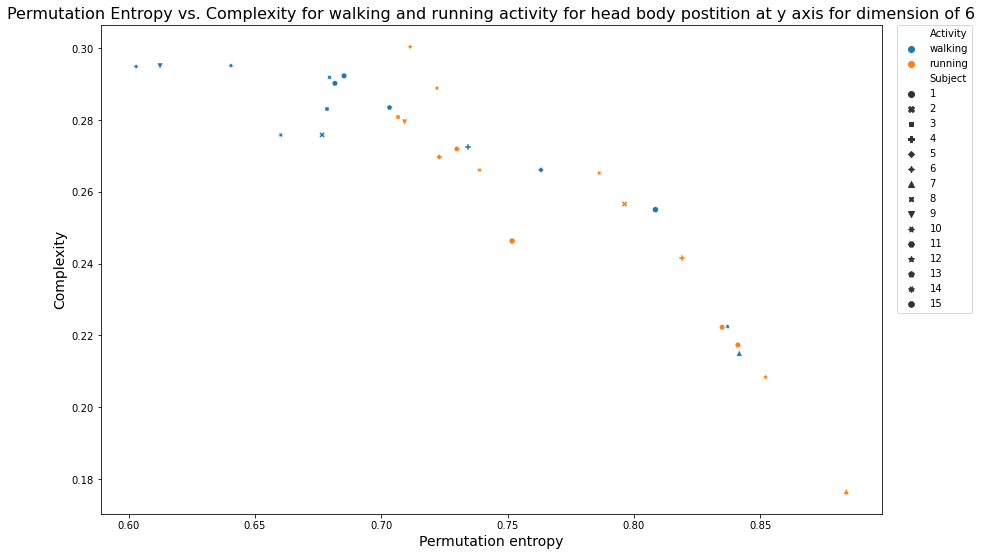

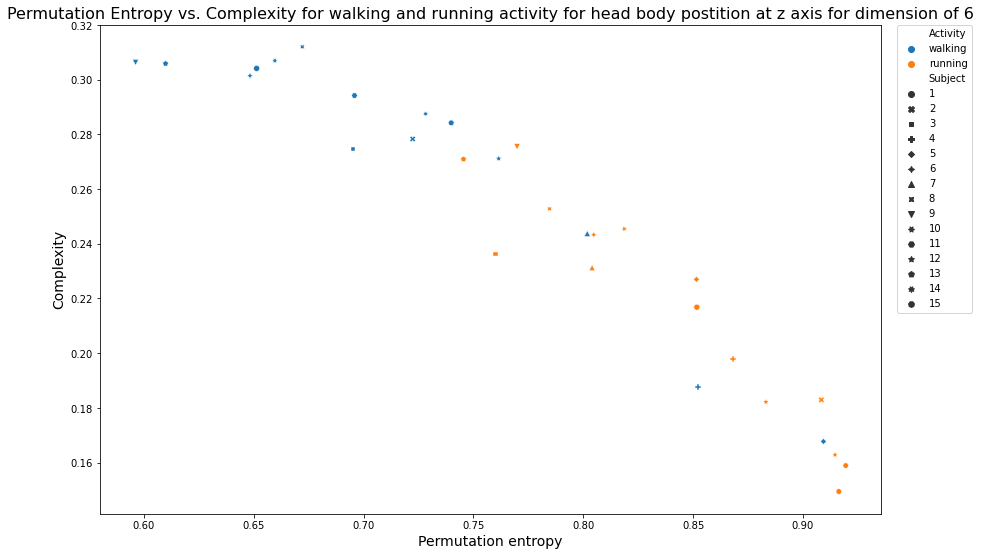

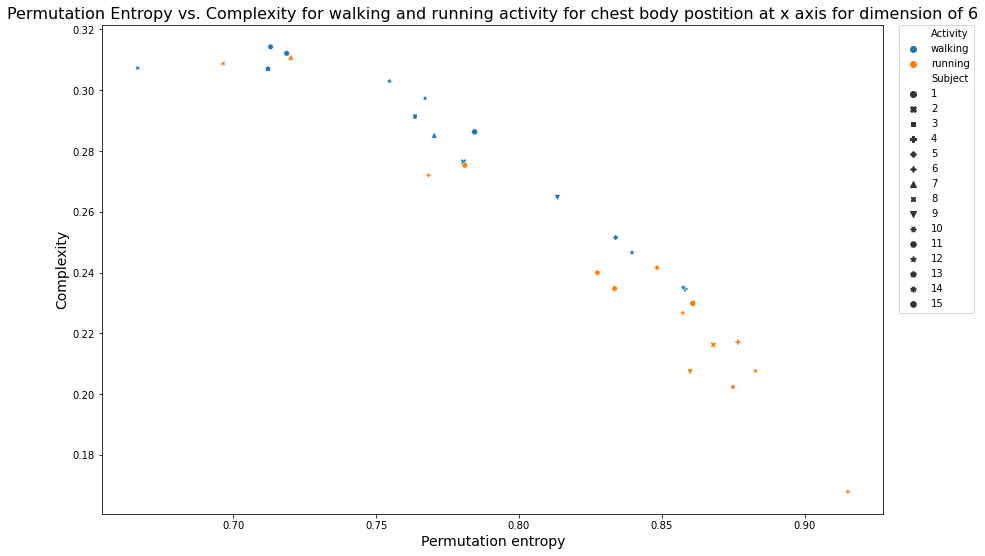

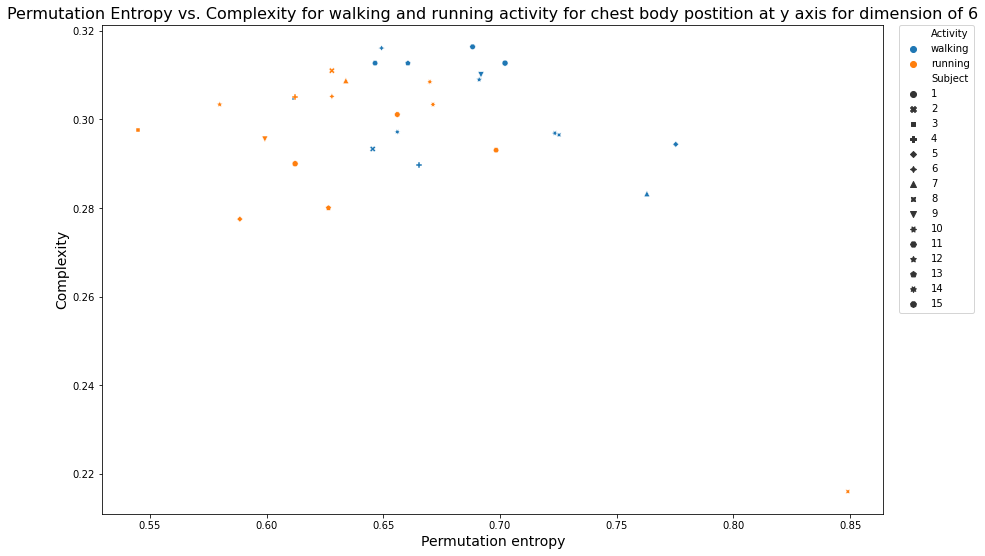

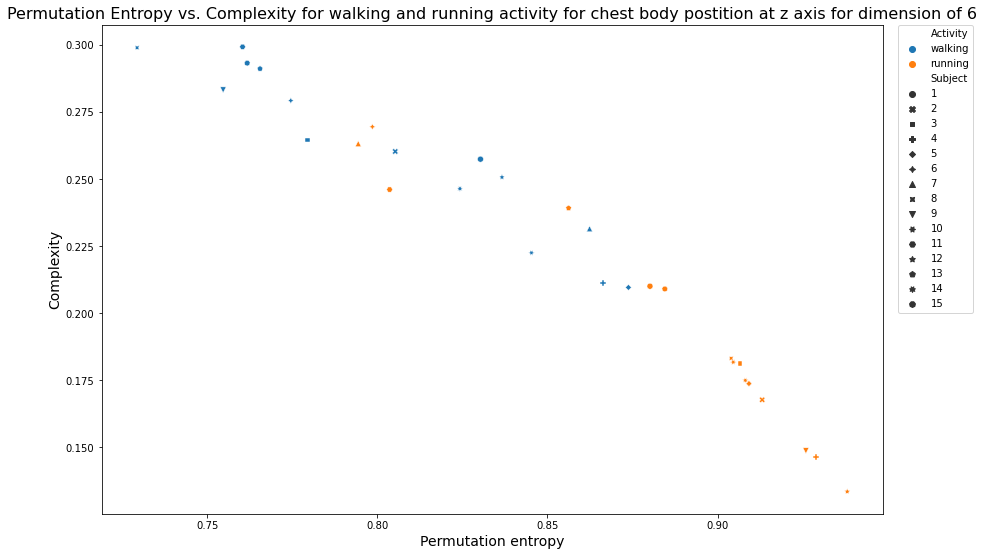

In [75]:
# Get the dataset with activity of running or walking
run_walk = df_result[(df_result['Activity'] == 'running') | (df_result['Activity'] == 'walking')]

body_position_list = ['head', 'chest']
axis_type = ['x','y','z']
dim_list=[3,4,5,6]

# calling the function in for loop to generate all different kinds of graphs
for dimension in dim_list:
    for body_position in body_position_list: 
        for axis in axis_type:
            data = run_walk[(run_walk['Body Position'] == body_position) & (run_walk['Accelerometer axis'] == axis)  & (run_walk['Dimension'] == dimension)] # getting the data according to position, axis & dimension in a loop
            scatter_plot_runwalk(data, body_position, axis, dimension)

### Generate scatter plots: permutation entropy and complexity for climbing up and climbing down

In [76]:
def scatter_plot_climbing(data, body_position, axis, dimension):
    """
        This function is used to plot the scatter plots of permutation entropy and complexity 
        for climbing up and climbing down activity of 15 subjects.
        data: data will be used for plotting
        bosy_position: head or chest
        axis: x,y or z
        subject: from 1 to 15
    """
    plt.figure(figsize = (14,9))
     # Use seaborn to plot scatter plot, 'hue' is used for making different colors of walking and running, 
    #'style' is used for making different markers for 15 subjects.
    sns.scatterplot(data = data,
                    x = 'Permutation entropy',
                    y = 'Complexity',
                    hue = 'Activity',
                    style='Subject') 
    
    # setting labels, legend and title for the plot
    plt.xlabel("Permutation entropy", fontsize = 14)
    plt.ylabel("Complexity", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Permutation Entropy vs. Complexity for climbingup and climbingdown activity for {body_position} postition at {axis} axis for dimension of {dimension}', 
              fontsize = 16)
    plt.show()

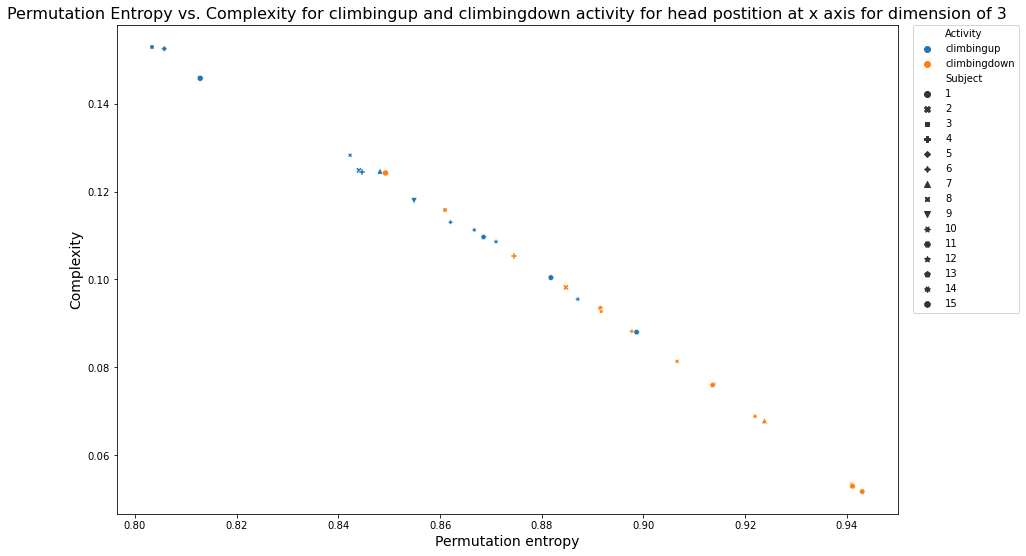

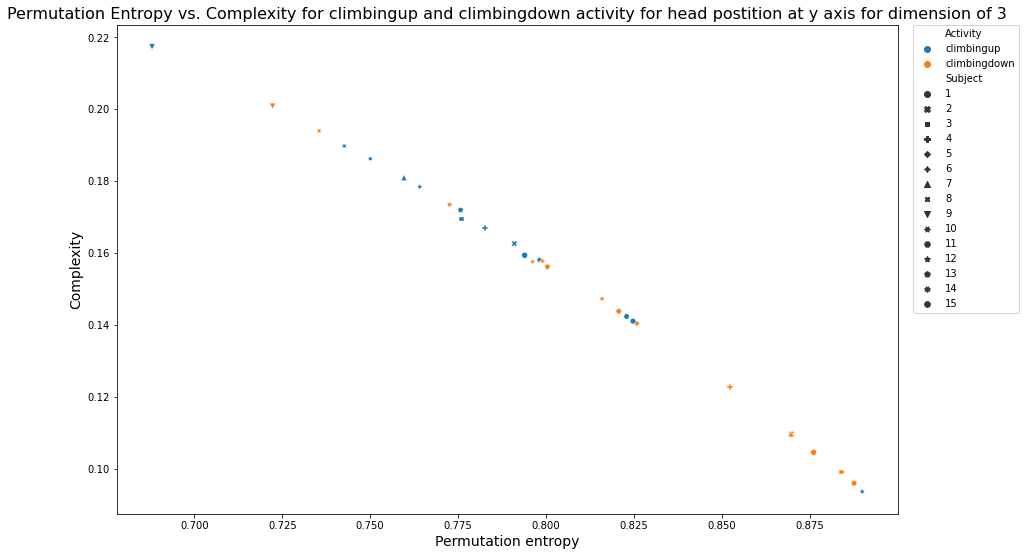

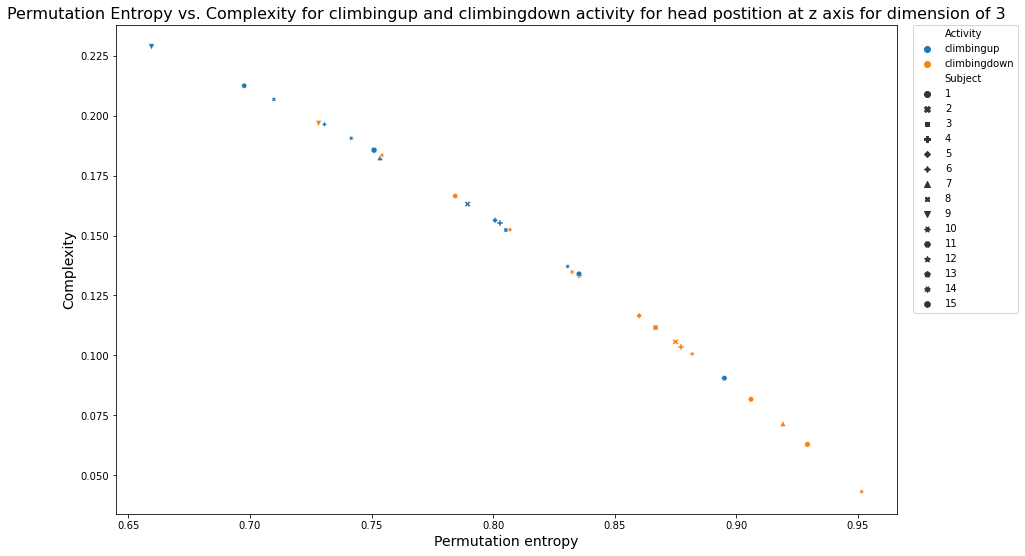

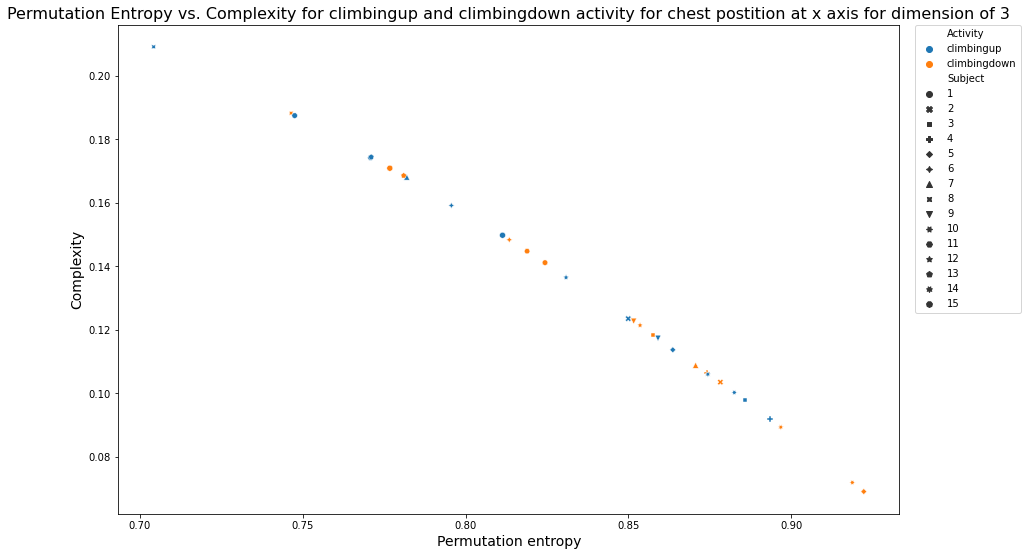

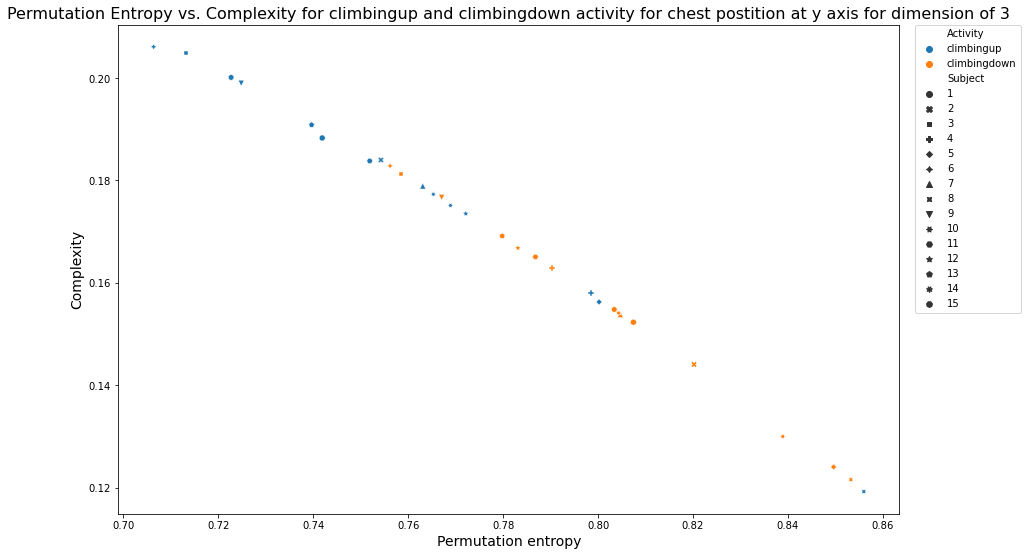

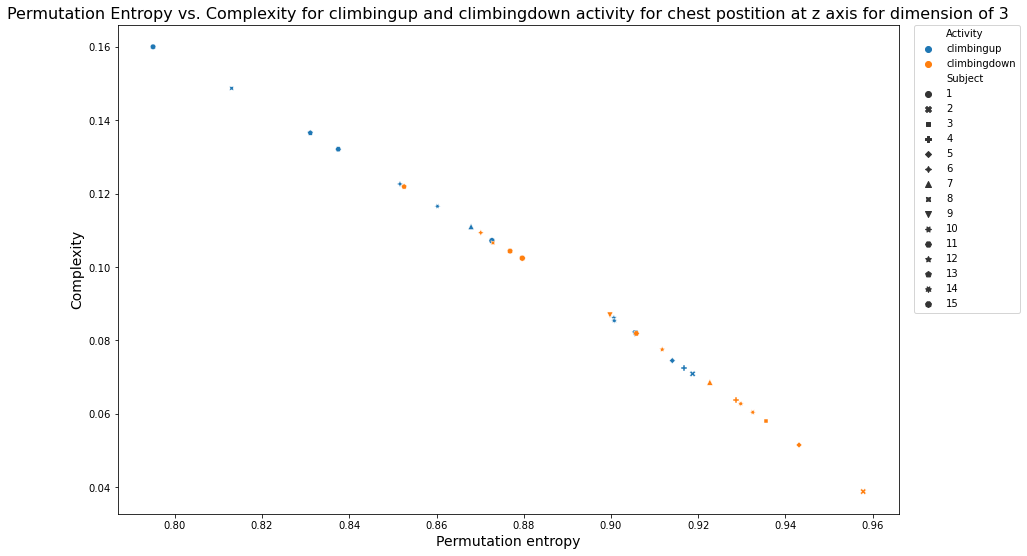

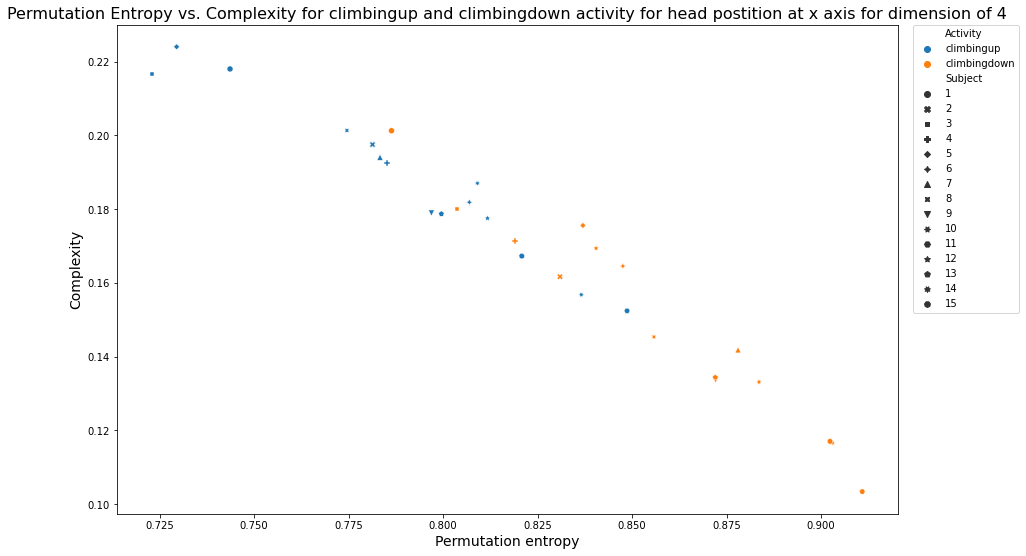

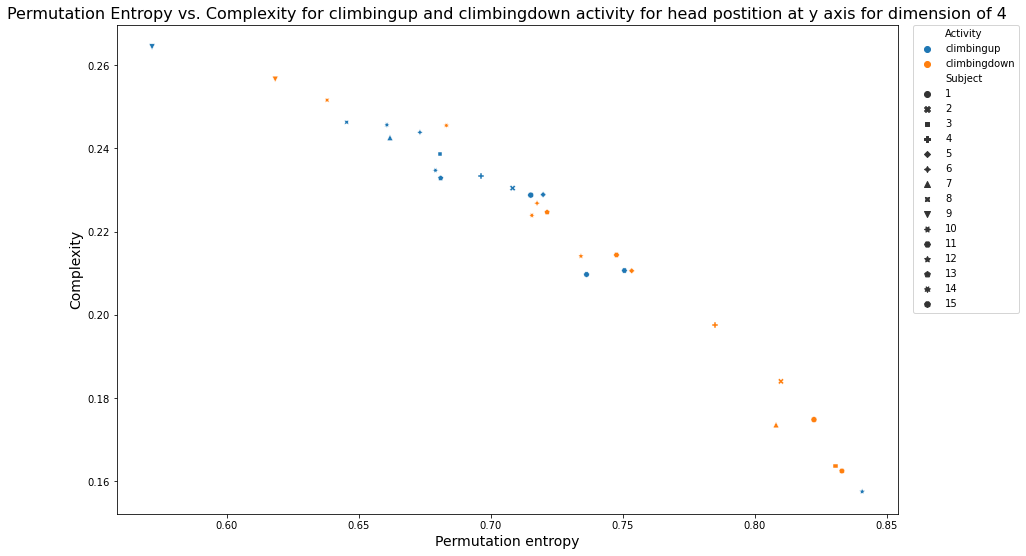

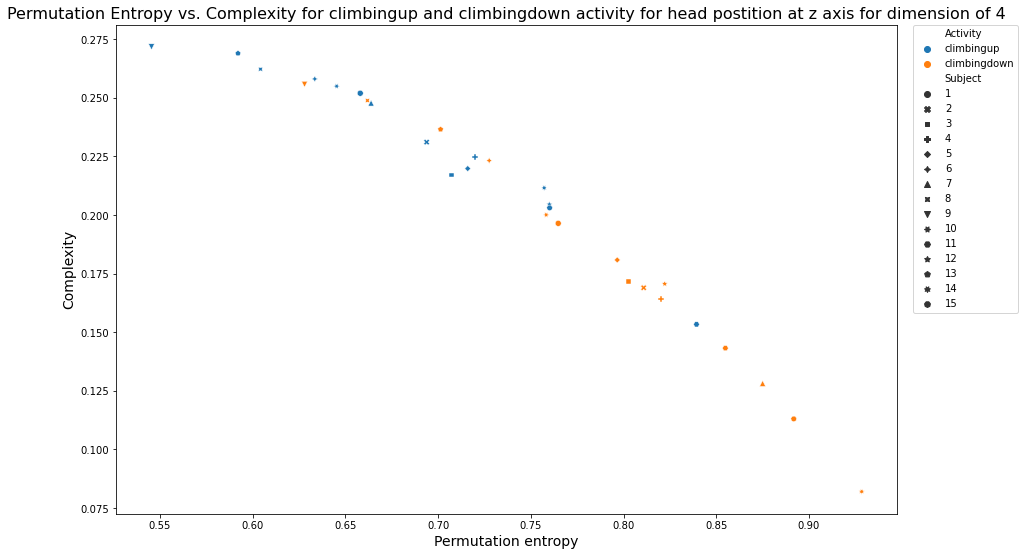

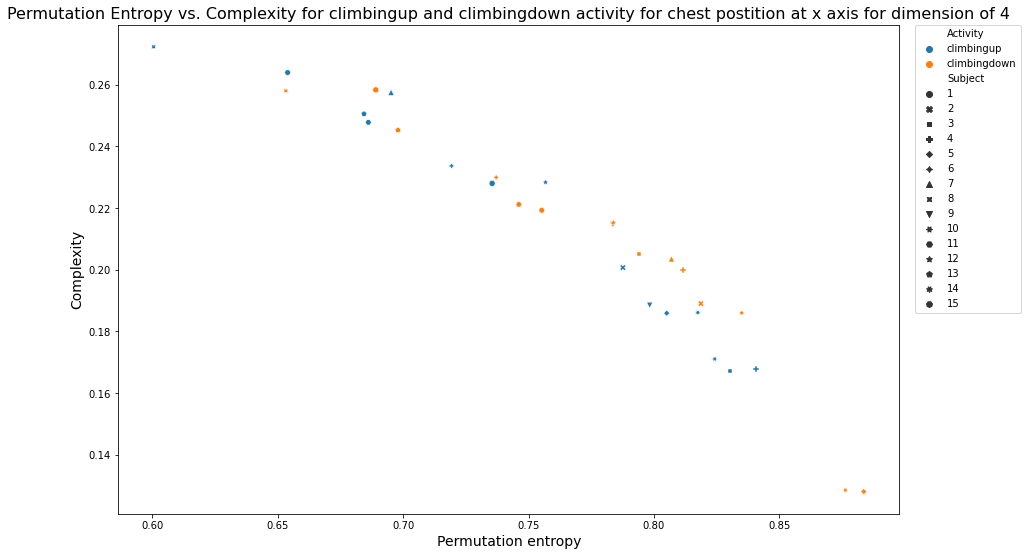

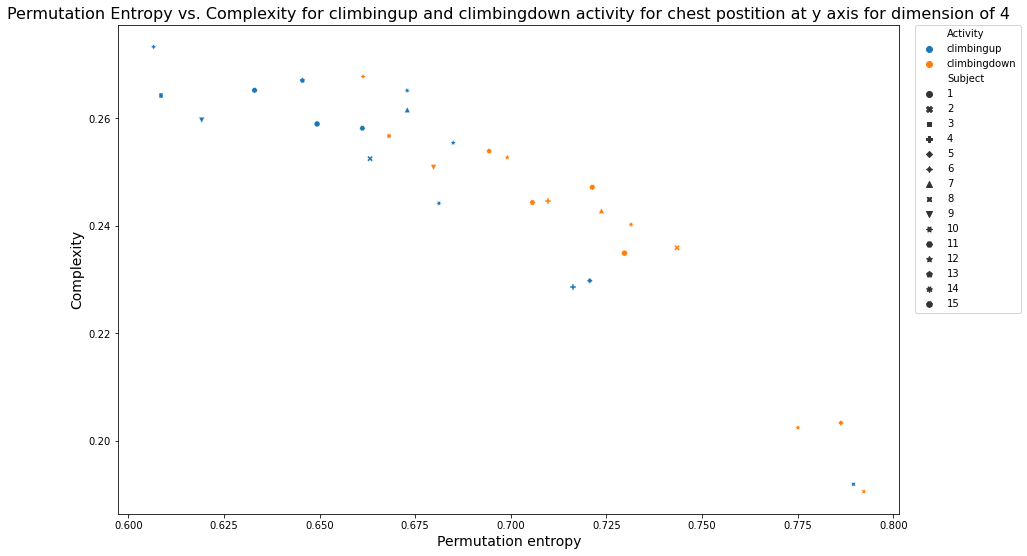

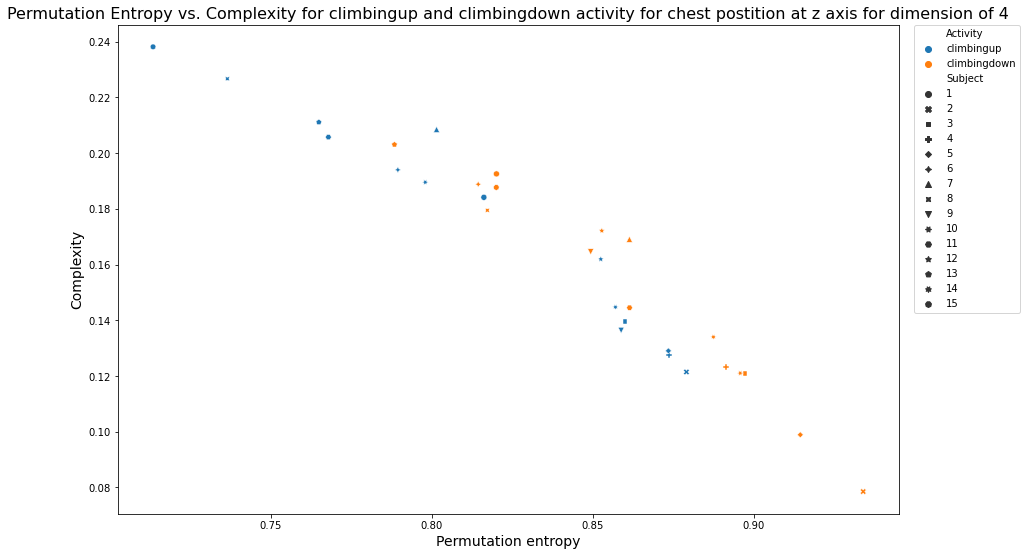

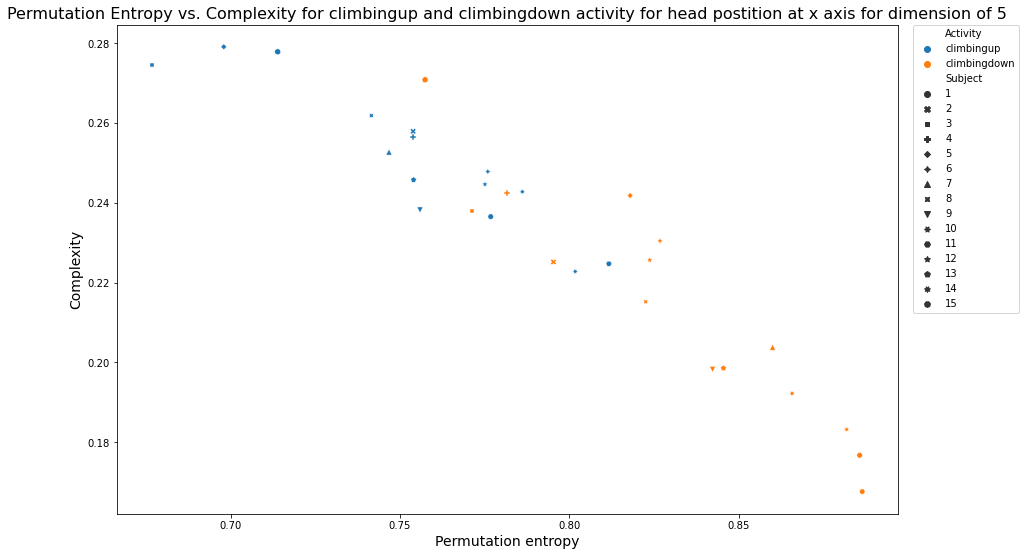

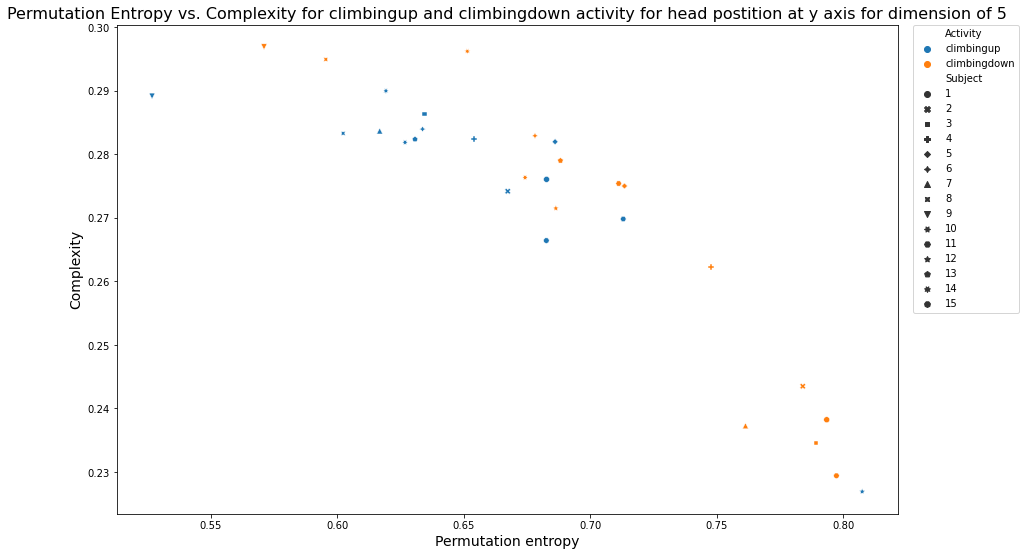

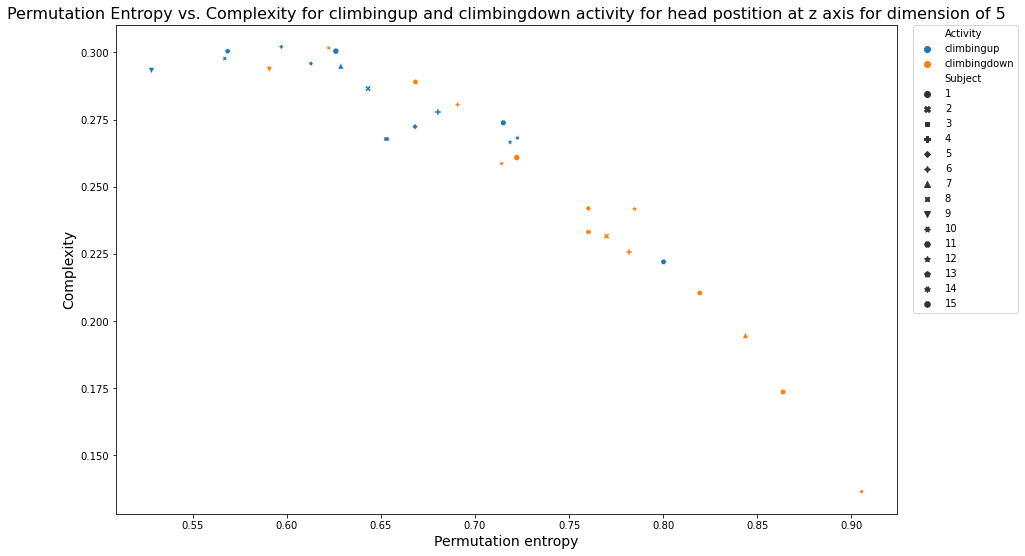

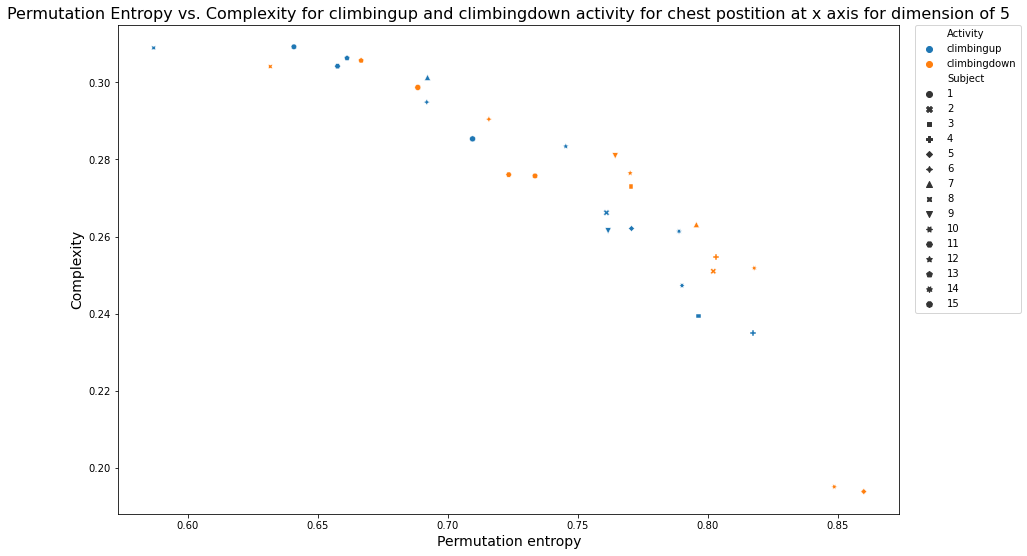

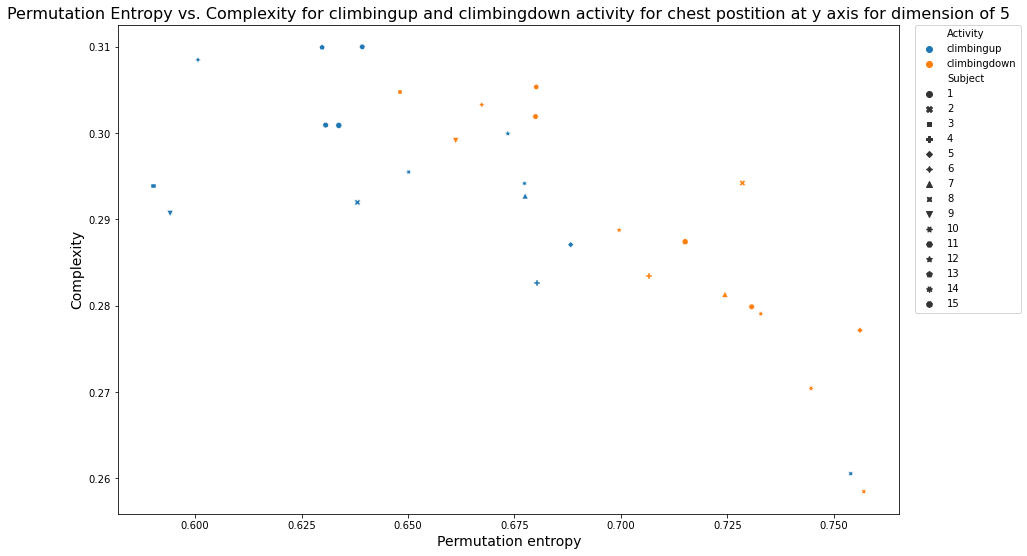

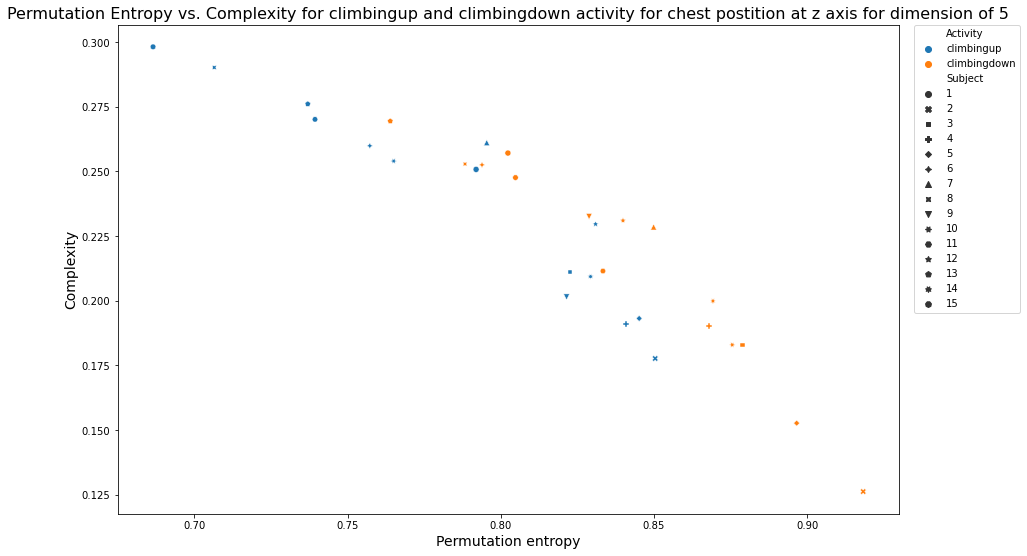

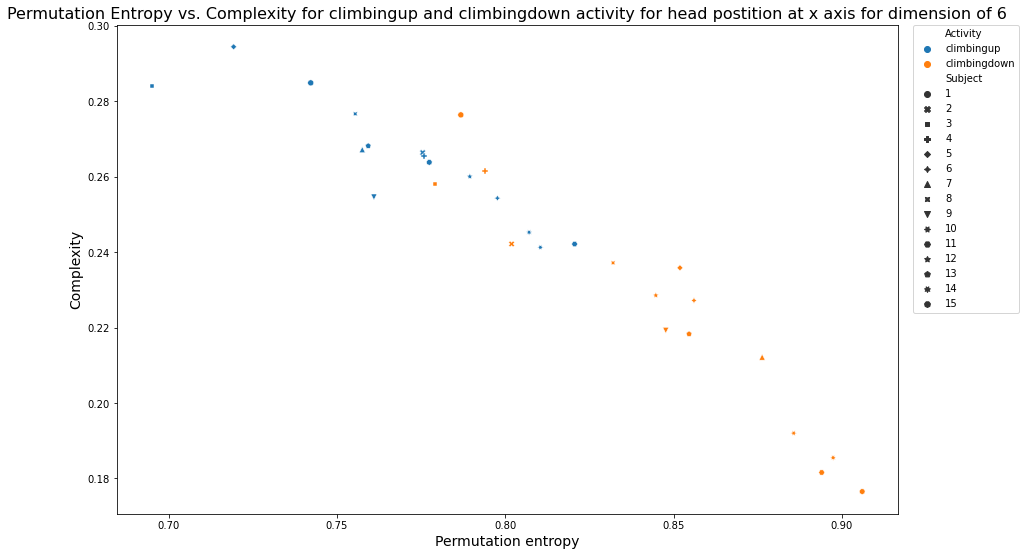

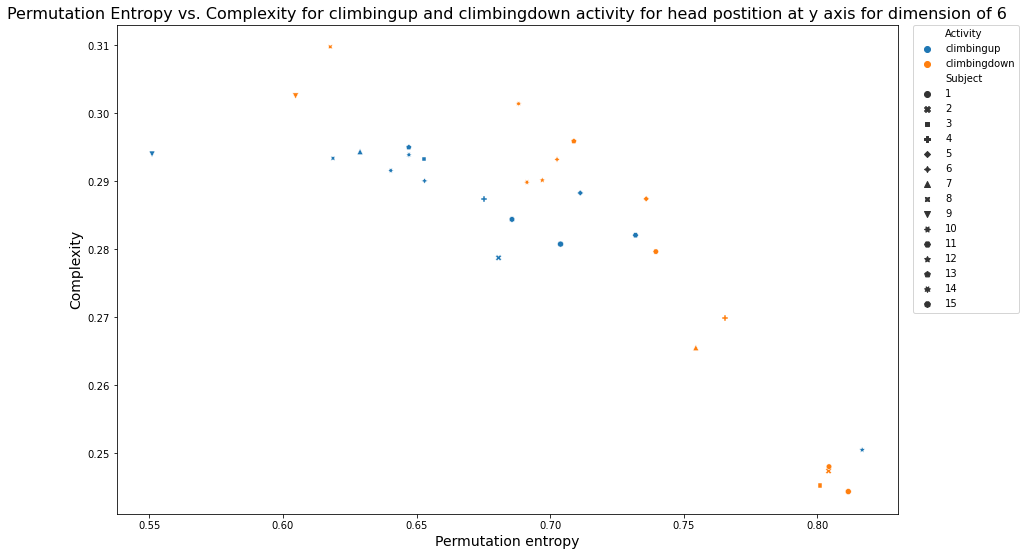

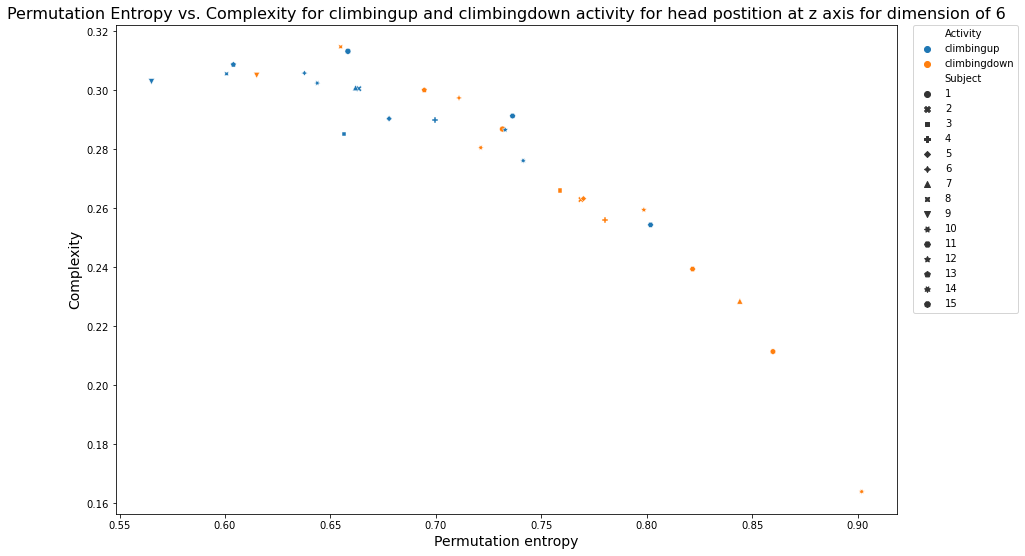

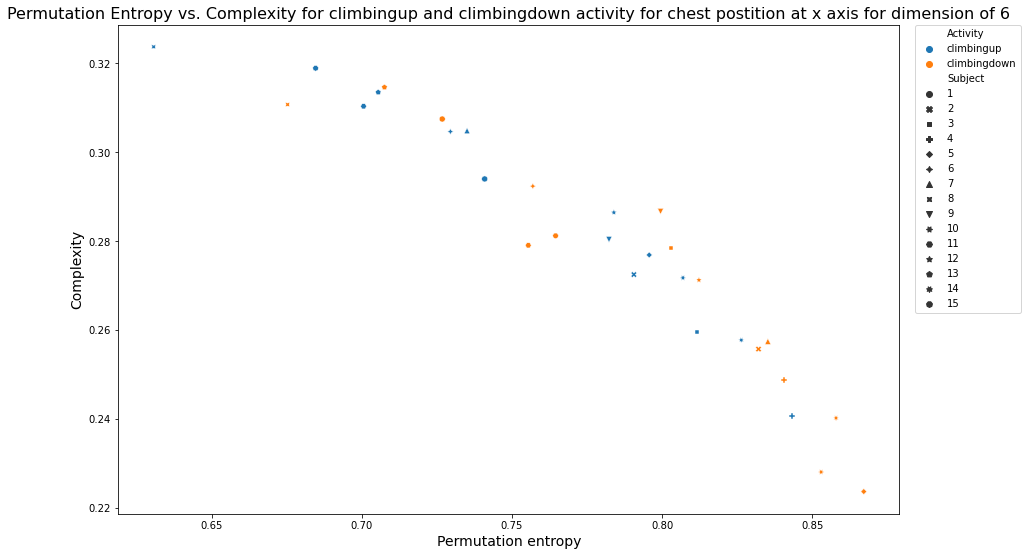

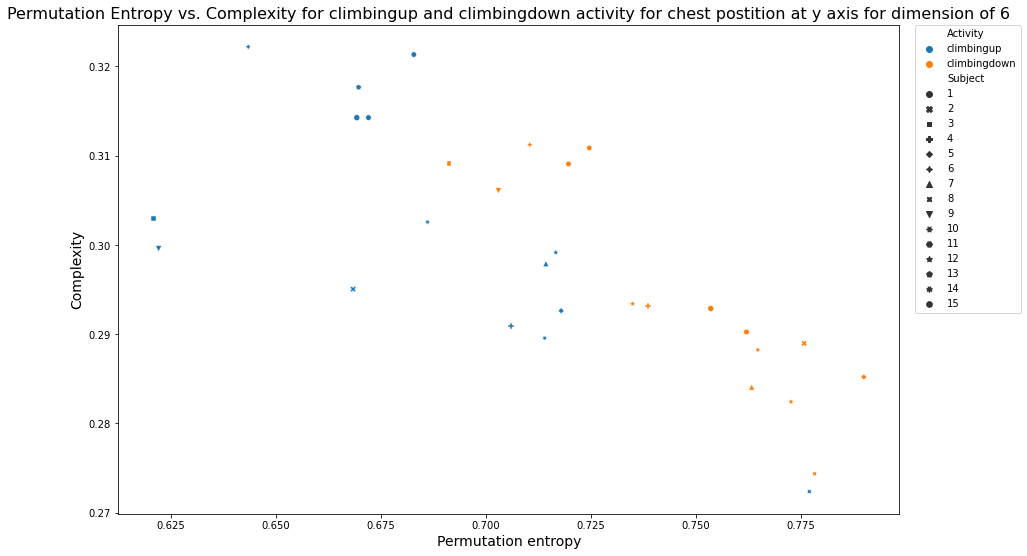

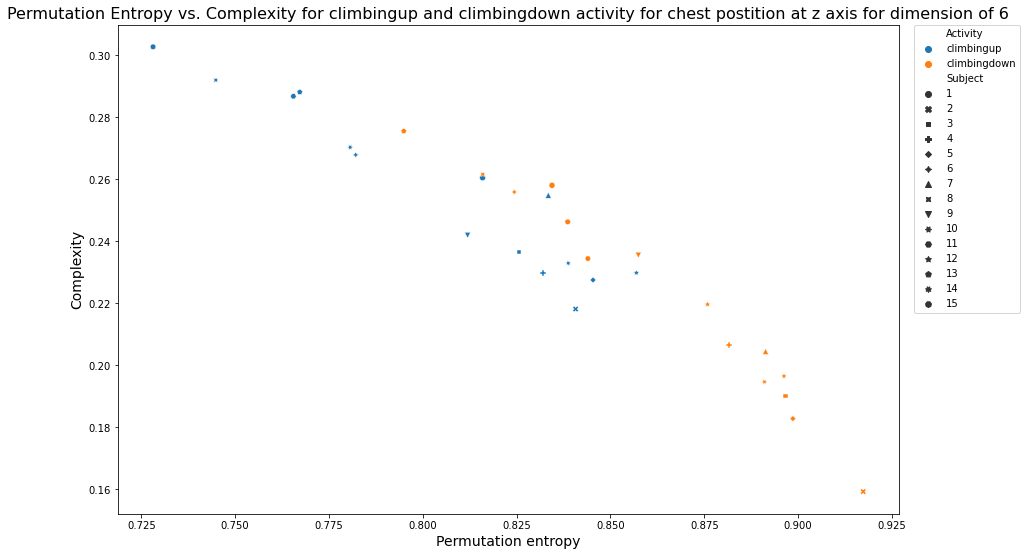

In [77]:
# Get the dataset with activity of climbing up or climbing down
climbing = df_result[(df_result['Activity'] == 'climbingup') | (df_result['Activity'] == 'climbingdown')]

body_position_list = ['head', 'chest']
axis_type = ['x','y','z']
dim_list = [3,4,5,6]

# calling the function in for loop to generate all different kinds of graphs
for dimension in dim_list:
    for body_position in body_position_list: 
        for axis in axis_type:
            data = climbing[(climbing['Body Position'] == body_position) & (climbing['Accelerometer axis'] == axis) & (climbing['Dimension'] == dimension)] # getting the data according to position, axis & dimension in a loop
            scatter_plot_climbing(data, body_position, axis, dimension)